In [8]:
import ROOT 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import matplotlib.transforms as mtransforms

def TH1toMatplot(hist):
    x = []
    y = []
    xerr = []
    yerr = []
    for i in range(1, hist.GetNbinsX()+1):
        x.append(hist.GetBinLowEdge(i))
        y.append(hist.GetBinContent(i))
        xerr.append(hist.GetBinWidth(i))
        yerr.append(hist.GetBinError(i))
    x.append(hist.GetBinLowEdge(hist.GetNbinsX()+1))
    xerr = [(x[i+1]-x[i])/2 for i in range(len(x)-1)] 
    x = [(x[i+1]+x[i])/2 for i in range(len(x)-1)]  
     
    #print('shapes', len(x), len(y), len(xerr), len(yerr))
    return x, y, xerr, yerr

In [9]:
fileUnfoldedR02 = ROOT.TFile.Open("AuAu_R02/UnfoldedResults.root")
fileUnfoldedR04 = ROOT.TFile.Open("AuAu_R04/UnfoldedResults.root")
fileUnfoldedR06 = ROOT.TFile.Open("AuAu_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedDNNRatio")
mult_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedMultRatio")
mult_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedMultRatio")
mult_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedMultRatio")
area_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedAreaRatio")
area_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedAreaRatio")
area_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedAreaRatio")

x_area_R02, y_area_R02, xerr_area_R02, yerr_area_R02 = TH1toMatplot(area_unfolded_ratio_R02)
x_area_R04, y_area_R04, xerr_area_R04, yerr_area_R04 = TH1toMatplot(area_unfolded_ratio_R04)
x_area_R06, y_area_R06, xerr_area_R06, yerr_area_R06 = TH1toMatplot(area_unfolded_ratio_R06)
x_mult_R02, y_mult_R02, xerr_mult_R02, yerr_mult_R02 = TH1toMatplot(mult_unfolded_ratio_R02)
x_mult_R04, y_mult_R04, xerr_mult_R04, yerr_mult_R04 = TH1toMatplot(mult_unfolded_ratio_R04)
x_mult_R06, y_mult_R06, xerr_mult_R06, yerr_mult_R06 = TH1toMatplot(mult_unfolded_ratio_R06)
x_dnn_R02, y_dnn_R02, xerr_dnn_R02, yerr_dnn_R02 = TH1toMatplot(dnn_unfolded_ratio_R02)
x_dnn_R04, y_dnn_R04, xerr_dnn_R04, yerr_dnn_R04 = TH1toMatplot(dnn_unfolded_ratio_R04)
x_dnn_R06, y_dnn_R06, xerr_dnn_R06, yerr_dnn_R06 = TH1toMatplot(dnn_unfolded_ratio_R06)

font_size = 17
marker_size = 12

methods=['area','dnn','mult']
rparm = ['R02','R04','R06']
for method in methods:
    for R in rparm:
        print(f'x_{method}_{R} = {x}')

label_style = dict(fontsize=font_size)
area_style = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='green', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method',capsize=0)
dnn_style = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network',capsize=0)
mult_style = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='red', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method',capsize=0)
legend_style = dict(fontsize=font_size, frameon=False, ncol=1, markerscale=1, labelspacing=0.2, handletextpad=0.1, columnspacing=0.2)

def format_axes(ax):
    ax.tick_params(labelsize=font_size)
    # ax.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
    ax.set_ylabel("Uncorrected/Truth", **label_style)
    ax.minorticks_on()
    ax.tick_params('both', length=15, width=2, which='major', direction='in')
    ax.tick_params('both', length=7, width=1, which='minor', direction='in')

area_offset = [x_area_R02[i]+0.5 for i in range(len(x_area_R02))]
dnn_offset = [x_dnn_R02[i]-0.5 for i in range(len(x_dnn_R02))]
mult_offset = x_mult_R02
xaxis = area_offset

area_offsetR04 = [x_area_R04[i]+0.5 for i in range(len(x_area_R04))]
dnn_offsetR04 = [x_dnn_R04[i]-0.5 for i in range(len(x_dnn_R04))]
mult_offsetR04 = x_mult_R04
xaxisR04 = area_offsetR04

area_offsetR06 = [x_area_R06[i]+0.5 for i in range(len(x_area_R06))]
dnn_offsetR06 = [x_dnn_R06[i]-0.5 for i in range(len(x_dnn_R06))]
mult_offsetR06 = x_mult_R06
xaxisR06 = area_offsetR06

fig = plt.figure(figsize=(6, 8), dpi=80,constrained_layout=True)
ax1 = plt.subplot2grid((3, 1), (0, 0), colspan=1, rowspan=1)
plt.rc('axes', unicode_minus=True)
# ax1.set_yscale('log')
ax1.errorbar(area_offset, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, **area_style)
ax1.errorbar(dnn_offset, y_dnn_R02, xerr=xerr_dnn_R02, yerr=yerr_dnn_R02, **dnn_style)
ax1.errorbar(mult_offset, y_mult_R02, xerr=xerr_mult_R02, yerr=yerr_mult_R02, **mult_style)

ax1.text(0.75, 0.75, r'$\bf{a)}$ R = 0.2 ', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.set_xlim(0-.5,area_offset[-1]+xerr_area_R02[-1]+0.5)
# ax1.set_xlim(5,60)
# ax1.set_ylim(0.5,1.5)
ax1.set_ylim(0.0,5)
ax1.plot([0-.5,area_offset[-1]+xerr_area_R02[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')
# ax1.text(0.05, 0.75, r'Au+Au 200 GeV', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
# ax1.text(0.05, 0.65, r'0-10% Centrality', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')

format_axes(ax1)

ax2 = plt.subplot2grid((3,1), (1, 0), colspan=1, rowspan=1,sharex=ax1)
# ax2.set_yscale('log')
ax2.set_ylim(0,5)
ax2.errorbar(area_offsetR04, y_area_R04, xerr=xerr_area_R04, yerr=yerr_area_R04, **area_style)
ax2.errorbar(dnn_offsetR04, y_dnn_R04, xerr=xerr_dnn_R04, yerr=yerr_dnn_R04, **dnn_style)
ax2.errorbar(mult_offsetR04, y_mult_R04, xerr=xerr_mult_R04, yerr=yerr_mult_R04, **mult_style)

ax2.text(0.75, 0.75, r'$\bf{b)}$ R = 0.4 ', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax2.set_xlim(0-.5,area_offsetR04[-1]+xerr_area_R04[-1]+0.5)
ax2.plot([0-.5,area_offsetR04[-1]+xerr_area_R04[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')
# ax2.set_ylim(0.5,1.5)

format_axes(ax2)


ax3 = plt.subplot2grid((3,1), (2, 0), colspan=1, rowspan=1,sharex=ax1)
# ax3.set_yscale('log')
ax3.errorbar(area_offsetR06, y_area_R06, xerr=xerr_area_R06, yerr=yerr_area_R06, **area_style)
ax3.errorbar(dnn_offsetR06, y_dnn_R06, xerr=xerr_dnn_R06, yerr=yerr_dnn_R06, **dnn_style)
ax3.errorbar(mult_offsetR06, y_mult_R06, xerr=xerr_mult_R06, yerr=yerr_mult_R06, **mult_style)

ax3.text(0.75, 0.75, r'$\bf{c)}$ R = 0.6 ', transform=ax3.transAxes, fontsize=font_size, verticalalignment='top')
ax3.set_xlim(0-.5,area_offsetR06[-1]+xerr_area_R06[-1]+0.5)
ax3.plot([0-.5,area_offsetR06[-1]+xerr_area_R06[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')
ax3.set_ylim(0.0,5)
ax3.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
format_axes(ax3)
ax1.set_xlim(10,70)
ax1.legend(loc='upper left', **legend_style)
ax1.tick_params(labelbottom=False)
ax2.tick_params(labelbottom=False)

# plt.show()



NameError: name 'x' is not defined

[3.4039020340390205, 1.4024847676073442]


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
/nfs/home/tmengel/.conda/envs/myhepenv/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


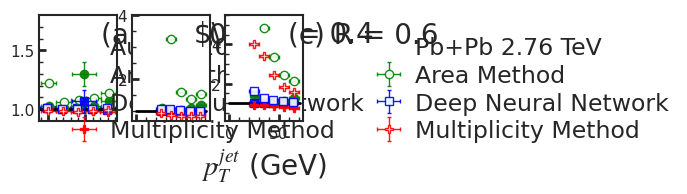

In [6]:
fig_width_pt = 246.0 
inches_per_pt = 1.0/72.27  
golden_mean = (np.sqrt(5)-1.0)/3.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
# fig_height = 5.5
fig_size =  [fig_width,fig_height]
print(fig_size)
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.transforms as mtransforms
params = {'backend': 'ps',
        'axes.labelsize': 11,
        'axes.linewidth' : 1.5,
        'font.size': 11,
        'font.family': 'serif',
        'font.serif': 'Times',
        'mathtext.fontset': 'stix',
        'legend.fontsize': 12,
        'xtick.labelsize': 11,
        'ytick.labelsize': 11,
        'text.usetex': False,
        'lines.linewidth': 1,
        'lines.linestyle': ' ',
        'lines.markersize' : 6,
        'lines.markeredgewidth' : 1,
        'xtick.major.size' : 5,
        'xtick.minor.size' : 3,
        'xtick.major.width' : 2,
        'xtick.minor.width' : 1,
        'xtick.direction' : 'in',
        'ytick.major.size' : 5,
        'ytick.minor.size' : 3,
        'ytick.major.width' : 2,
        'ytick.minor.width' : 1,
        'ytick.direction' : 'in',
        'xtick.minor.visible' : True,
        'ytick.minor.visible' : True,
        'figure.figsize': fig_size,
        'savefig.transparent': True,
        'errorbar.capsize': 1.5,
        }
plt.rcParams.update(params)

fileUnfoldedR02_pbpb = ROOT.TFile.Open("PbPb_R02/UnfoldedResults.root")
fileUnfoldedR04_pbpb = ROOT.TFile.Open("PbPb_R04/UnfoldedResults.root")
fileUnfoldedR06_pbpb = ROOT.TFile.Open("PbPb_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("hFoldedDNNRatio")
mult_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("hFoldedMultRatio")
mult_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("hFoldedMultRatio")
mult_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("hFoldedMultRatio")
area_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("hFoldedAreaRatio")
area_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("hFoldedAreaRatio")
area_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("hFoldedAreaRatio")

x_area_R02_pbpb, y_area_R02_pbpb, xerr_area_R02_pbpb, yerr_area_R02_pbpb = TH1toMatplot(area_unfolded_ratio_R02_pbpb)
x_area_R04_pbpb, y_area_R04_pbpb, xerr_area_R04_pbpb, yerr_area_R04_pbpb = TH1toMatplot(area_unfolded_ratio_R04_pbpb)
x_area_R06_pbpb, y_area_R06_pbpb, xerr_area_R06_pbpb, yerr_area_R06_pbpb = TH1toMatplot(area_unfolded_ratio_R06_pbpb)
x_mult_R02_pbpb, y_mult_R02_pbpb, xerr_mult_R02_pbpb, yerr_mult_R02_pbpb = TH1toMatplot(mult_unfolded_ratio_R02_pbpb)
x_mult_R04_pbpb, y_mult_R04_pbpb, xerr_mult_R04_pbpb, yerr_mult_R04_pbpb = TH1toMatplot(mult_unfolded_ratio_R04_pbpb)
x_mult_R06_pbpb, y_mult_R06_pbpb, xerr_mult_R06_pbpb, yerr_mult_R06_pbpb = TH1toMatplot(mult_unfolded_ratio_R06_pbpb)
x_dnn_R02_pbpb, y_dnn_R02_pbpb, xerr_dnn_R02_pbpb, yerr_dnn_R02_pbpb = TH1toMatplot(dnn_unfolded_ratio_R02_pbpb)
x_dnn_R04_pbpb, y_dnn_R04_pbpb, xerr_dnn_R04_pbpb, yerr_dnn_R04_pbpb = TH1toMatplot(dnn_unfolded_ratio_R04_pbpb)
x_dnn_R06_pbpb, y_dnn_R06_pbpb, xerr_dnn_R06_pbpb, yerr_dnn_R06_pbpb = TH1toMatplot(dnn_unfolded_ratio_R06_pbpb)

fileUnfoldedR02 = ROOT.TFile.Open("AuAu_R02/UnfoldedResults.root")
fileUnfoldedR04 = ROOT.TFile.Open("AuAu_R04/UnfoldedResults.root")
fileUnfoldedR06 = ROOT.TFile.Open("AuAu_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedDNNRatio")
mult_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedMultRatio")
mult_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedMultRatio")
mult_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedMultRatio")
area_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedAreaRatio")
area_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedAreaRatio")
area_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedAreaRatio")

x_area_R02_pbpb, y_area_R02_pbpb, xerr_area_R02_pbpb, yerr_area_R02_pbpb = TH1toMatplot(area_unfolded_ratio_R02_pbpb)
x_area_R04_pbpb, y_area_R04_pbpb, xerr_area_R04_pbpb, yerr_area_R04_pbpb = TH1toMatplot(area_unfolded_ratio_R04_pbpb)
x_area_R06_pbpb, y_area_R06_pbpb, xerr_area_R06_pbpb, yerr_area_R06_pbpb = TH1toMatplot(area_unfolded_ratio_R06_pbpb)
x_mult_R02_pbpb, y_mult_R02_pbpb, xerr_mult_R02_pbpb, yerr_mult_R02_pbpb = TH1toMatplot(mult_unfolded_ratio_R02_pbpb)
x_mult_R04_pbpb, y_mult_R04_pbpb, xerr_mult_R04_pbpb, yerr_mult_R04_pbpb = TH1toMatplot(mult_unfolded_ratio_R04_pbpb)
x_mult_R06_pbpb, y_mult_R06_pbpb, xerr_mult_R06_pbpb, yerr_mult_R06_pbpb = TH1toMatplot(mult_unfolded_ratio_R06_pbpb)
x_dnn_R02_pbpb, y_dnn_R02_pbpb, xerr_dnn_R02_pbpb, yerr_dnn_R02_pbpb = TH1toMatplot(dnn_unfolded_ratio_R02_pbpb)
x_dnn_R04_pbpb, y_dnn_R04_pbpb, xerr_dnn_R04_pbpb, yerr_dnn_R04_pbpb = TH1toMatplot(dnn_unfolded_ratio_R04_pbpb)
x_dnn_R06_pbpb, y_dnn_R06_pbpb, xerr_dnn_R06_pbpb, yerr_dnn_R06_pbpb = TH1toMatplot(dnn_unfolded_ratio_R06_pbpb)
x_area_R02, y_area_R02, xerr_area_R02, yerr_area_R02 = TH1toMatplot(area_unfolded_ratio_R02)
x_area_R04, y_area_R04, xerr_area_R04, yerr_area_R04 = TH1toMatplot(area_unfolded_ratio_R04)
x_area_R06, y_area_R06, xerr_area_R06, yerr_area_R06 = TH1toMatplot(area_unfolded_ratio_R06)
x_mult_R02, y_mult_R02, xerr_mult_R02, yerr_mult_R02 = TH1toMatplot(mult_unfolded_ratio_R02)
x_mult_R04, y_mult_R04, xerr_mult_R04, yerr_mult_R04 = TH1toMatplot(mult_unfolded_ratio_R04)
x_mult_R06, y_mult_R06, xerr_mult_R06, yerr_mult_R06 = TH1toMatplot(mult_unfolded_ratio_R06)
x_dnn_R02, y_dnn_R02, xerr_dnn_R02, yerr_dnn_R02 = TH1toMatplot(dnn_unfolded_ratio_R02)
x_dnn_R04, y_dnn_R04, xerr_dnn_R04, yerr_dnn_R04 = TH1toMatplot(dnn_unfolded_ratio_R04)
x_dnn_R06, y_dnn_R06, xerr_dnn_R06, yerr_dnn_R06 = TH1toMatplot(dnn_unfolded_ratio_R06)

area_offset = [x_area_R02[i]+0.5 for i in range(len(x_area_R02))]
dnn_offset = [x_dnn_R02[i]-0.5 for i in range(len(x_dnn_R02))]
mult_offset = x_mult_R02
xaxis = area_offset

area_offsetR04 = [x_area_R04[i]+0.5 for i in range(len(x_area_R04))]
dnn_offsetR04 = [x_dnn_R04[i]-0.5 for i in range(len(x_dnn_R04))]
mult_offsetR04 = x_mult_R04
xaxisR04 = area_offsetR04

area_offsetR06 = [x_area_R06[i]+0.5 for i in range(len(x_area_R06))]
dnn_offsetR06 = [x_dnn_R06[i]-0.5 for i in range(len(x_dnn_R06))]
mult_offsetR06 = x_mult_R06
xaxisR06 = area_offsetR06

area_offsetR02_pbpb = [x_area_R02_pbpb[i]+0.5 for i in range(len(x_area_R02_pbpb))]
dnn_offsetR02_pbpb = [x_dnn_R02_pbpb[i]-0.5 for i in range(len(x_dnn_R02_pbpb))]
mult_offsetR02_pbpb = x_mult_R02_pbpb
xaxis = area_offsetR02_pbpb

area_offsetR04_pbpb = [x_area_R04_pbpb[i]+0.5 for i in range(len(x_area_R04_pbpb))]
dnn_offsetR04_pbpb = [x_dnn_R04_pbpb[i]-0.5 for i in range(len(x_dnn_R04_pbpb))]
mult_offsetR04_pbpb = x_mult_R04_pbpb
xaxisR04_pbpb = area_offsetR04_pbpb

area_offsetR06_pbpb = [x_area_R06_pbpb[i]+0.5 for i in range(len(x_area_R06_pbpb))]
dnn_offsetR06_pbpb = [x_dnn_R06_pbpb[i]-0.5 for i in range(len(x_dnn_R06_pbpb))]
mult_offsetR06_pbpb = x_mult_R06_pbpb
xaxisR06_pbpb = area_offsetR06_pbpb



fig = plt.figure(dpi=100, constrained_layout=True)
plt.rc('axes', unicode_minus=True)
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

area_style = dict(color='green', marker='o', markerfacecolor='green', markeredgecolor='green', alpha=0.9, label='Area Method')
dnn_style = dict(color='blue',  marker='s', markerfacecolor='blue', markeredgecolor='blue', alpha=0.9, label='Deep Neural Network')
mult_style = dict(color='red',  marker='P', markerfacecolor='red', markeredgecolor='red', alpha=0.9, label='Multiplicity Method')
area_style_pbpb = dict(color='green', marker='o', markerfacecolor='white', markeredgecolor='green', alpha=0.9, label='Area Method')
dnn_style_pbpb = dict(color='blue',  marker='s', markerfacecolor='white', markeredgecolor='blue', alpha=0.9, label='Deep Neural Network')
mult_style_pbpb = dict(color='red',  marker='P', markerfacecolor='white', markeredgecolor='red', alpha=0.9, label='Multiplicity Method')


ax1.errorbar(area_offset, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, markerfacecolor='none', markeredgecolor='none', linestyle='', linewidth=2, color='none', label='Au+Au 200 GeV')
ax1.errorbar(area_offset, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, **area_style)
ax1.errorbar(dnn_offset, y_dnn_R02, xerr=xerr_dnn_R02, yerr=yerr_dnn_R02, **dnn_style)
ax1.errorbar(mult_offset, y_mult_R02, xerr=xerr_mult_R02, yerr=yerr_mult_R02, **mult_style)
ax1.errorbar(area_offsetR04, y_area_R04, xerr=xerr_area_R04, yerr=yerr_area_R04,  markerfacecolor='none', markeredgecolor='none', linestyle='', linewidth=2, color='none', label='Pb+Pb 2.76 TeV')
ax1.errorbar(area_offsetR02_pbpb, y_area_R02_pbpb, xerr=xerr_area_R02_pbpb, yerr=yerr_area_R02_pbpb, **area_style_pbpb)
ax1.errorbar(dnn_offsetR02_pbpb, y_dnn_R02_pbpb, xerr=xerr_dnn_R02_pbpb, yerr=yerr_dnn_R02_pbpb, **dnn_style_pbpb)
ax1.errorbar(mult_offsetR02_pbpb, y_mult_R02_pbpb, xerr=xerr_mult_R02_pbpb, yerr=yerr_mult_R02_pbpb, **mult_style_pbpb)
ax1.text(0.8, 0.95, r'(a) R = 0.2 ', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.plot([0-.5,area_offset[-1]+xerr_area_R02[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax2.errorbar(area_offsetR04, y_area_R04, xerr=xerr_area_R04, yerr=yerr_area_R04, **area_style)
ax2.errorbar(dnn_offsetR04, y_dnn_R04, xerr=xerr_dnn_R04, yerr=yerr_dnn_R04, **dnn_style)
ax2.errorbar(mult_offsetR04, y_mult_R04, xerr=xerr_mult_R04, yerr=yerr_mult_R04, **mult_style)
ax2.errorbar(area_offsetR04_pbpb, y_area_R04_pbpb, xerr=xerr_area_R04_pbpb, yerr=yerr_area_R04_pbpb, **area_style_pbpb)
ax2.errorbar(dnn_offsetR04_pbpb, y_dnn_R04_pbpb, xerr=xerr_dnn_R04_pbpb, yerr=yerr_dnn_R04_pbpb, **dnn_style_pbpb)
ax2.errorbar(mult_offsetR04_pbpb, y_mult_R04_pbpb, xerr=xerr_mult_R04_pbpb, yerr=yerr_mult_R04_pbpb, **mult_style_pbpb)


ax2.text(0.8,0.95, r'$\(b) R = 0.4', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax2.plot([0-.5,area_offsetR04[-1]+xerr_area_R04[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')


ax3.errorbar(area_offsetR06, y_area_R06, xerr=xerr_area_R06, yerr=yerr_area_R06, **area_style)
ax3.errorbar(dnn_offsetR06, y_dnn_R06, xerr=xerr_dnn_R06, yerr=yerr_dnn_R06, **dnn_style)
ax3.errorbar(mult_offsetR06, y_mult_R06, xerr=xerr_mult_R06, yerr=yerr_mult_R06, **mult_style)
ax3.errorbar(area_offsetR06_pbpb, y_area_R06_pbpb, xerr=xerr_area_R06_pbpb, yerr=yerr_area_R06_pbpb, **area_style_pbpb)
ax3.errorbar(dnn_offsetR06_pbpb, y_dnn_R06_pbpb, xerr=xerr_dnn_R06_pbpb, yerr=yerr_dnn_R06_pbpb, **dnn_style_pbpb)
ax3.errorbar(mult_offsetR06_pbpb, y_mult_R06_pbpb, xerr=xerr_mult_R06_pbpb, yerr=yerr_mult_R06_pbpb, **mult_style_pbpb)
ax3.text(0.8, 0.95, r'(c) R = 0.6 ', transform=ax3.transAxes, fontsize=font_size, verticalalignment='top')
ax3.plot([0-.5,area_offsetR06[-1]+xerr_area_R06[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax3.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)

ax1.set_ylim(0.9,1.8)
ax2.set_ylim(0.7,4.0)
ax3.set_ylim(0.1,5.5)
ax1.set_xlim(19,71)

ax1.legend(loc='upper left', **legend_style)
# ax1.legend(ax1.lines[:8], [r'Au+Au 200 GeV', 'Area Method', 'Deep Neural Network', 'Multiplicity Method'], loc='upper center', **legend_style)
#ax2.text(0.05, 0.95, r'$\bf{Pb+Pb}$', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax1.tick_params(labelbottom=False)
ax2.tick_params(labelbottom=False)


fig.align_ylabels()

plt.show()

x_area_R02_pbpb =  [25.0, 35.0, 45.0, 55.0, 65.0]
y_area_R02_pbpb =  [1.2202924489974976, 1.0648248195648193, 1.077588438987732, 1.0922467708587646, 1.134827971458435]
xerr_area_R02_pbpb =  [5.0, 5.0, 5.0, 5.0, 5.0]
yerr_area_R02_pbpb =  [0.005286111026663784, 0.006080496039351653, 0.007928921545341656, 0.010843068788547894, 0.015894144134156674]
x_mult_R02_pbpb =  [25.0, 35.0, 45.0, 55.0, 65.0]
y_mult_R02_pbpb =  [0.9845506548881531, 0.9857234358787537, 0.9772542119026184, 0.9807068705558777, 0.9887382984161377]
xerr_mult_R02_pbpb =  [5.0, 5.0, 5.0, 5.0, 5.0]
yerr_mult_R02_pbpb =  [0.004488997282301386, 0.0057371373641851835, 0.007366190529340545, 0.009996894412494172, 0.014319247107085641]
x_dnn_R02_pbpb =  [25.0, 35.0, 45.0, 55.0, 65.0]
y_dnn_R02_pbpb =  [1.007487416267395, 1.0051456689834595, 1.0021060705184937, 1.002418041229248, 1.0139728784561157]
xerr_dnn_R02_pbpb =  [5.0, 5.0, 5.0, 5.0, 5.0]
yerr_dnn_R02_pbpb =  [0.004567152000625724, 0.005821645903479744, 0.00750599567159104,

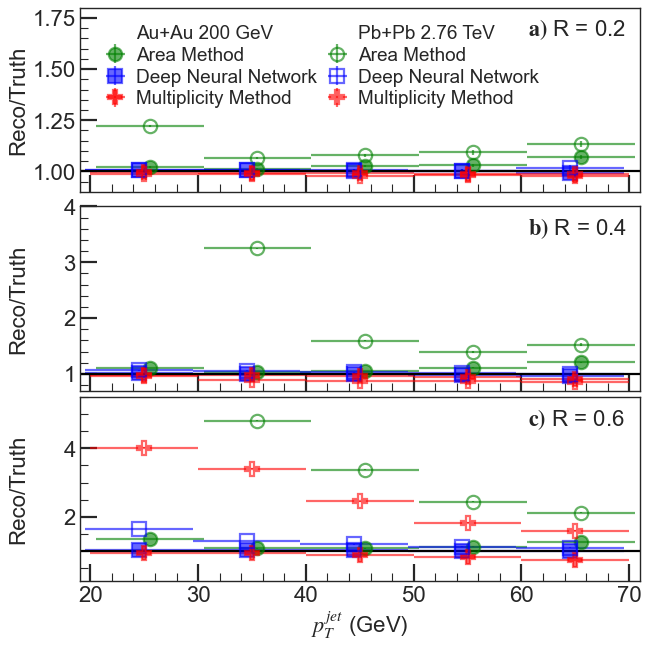

In [10]:
fileUnfoldedR02_pbpb = ROOT.TFile.Open("PbPb_R02/UnfoldedResults.root")
fileUnfoldedR04_pbpb = ROOT.TFile.Open("PbPb_R04/UnfoldedResults.root")
fileUnfoldedR06_pbpb = ROOT.TFile.Open("PbPb_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("hFoldedDNNRatio")
mult_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("hFoldedMultRatio")
mult_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("hFoldedMultRatio")
mult_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("hFoldedMultRatio")
area_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("hFoldedAreaRatio")
area_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("hFoldedAreaRatio")
area_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("hFoldedAreaRatio")

x_area_R02_pbpb, y_area_R02_pbpb, xerr_area_R02_pbpb, yerr_area_R02_pbpb = TH1toMatplot(area_unfolded_ratio_R02_pbpb)
x_area_R04_pbpb, y_area_R04_pbpb, xerr_area_R04_pbpb, yerr_area_R04_pbpb = TH1toMatplot(area_unfolded_ratio_R04_pbpb)
x_area_R06_pbpb, y_area_R06_pbpb, xerr_area_R06_pbpb, yerr_area_R06_pbpb = TH1toMatplot(area_unfolded_ratio_R06_pbpb)
x_mult_R02_pbpb, y_mult_R02_pbpb, xerr_mult_R02_pbpb, yerr_mult_R02_pbpb = TH1toMatplot(mult_unfolded_ratio_R02_pbpb)
x_mult_R04_pbpb, y_mult_R04_pbpb, xerr_mult_R04_pbpb, yerr_mult_R04_pbpb = TH1toMatplot(mult_unfolded_ratio_R04_pbpb)
x_mult_R06_pbpb, y_mult_R06_pbpb, xerr_mult_R06_pbpb, yerr_mult_R06_pbpb = TH1toMatplot(mult_unfolded_ratio_R06_pbpb)
x_dnn_R02_pbpb, y_dnn_R02_pbpb, xerr_dnn_R02_pbpb, yerr_dnn_R02_pbpb = TH1toMatplot(dnn_unfolded_ratio_R02_pbpb)
x_dnn_R04_pbpb, y_dnn_R04_pbpb, xerr_dnn_R04_pbpb, yerr_dnn_R04_pbpb = TH1toMatplot(dnn_unfolded_ratio_R04_pbpb)
x_dnn_R06_pbpb, y_dnn_R06_pbpb, xerr_dnn_R06_pbpb, yerr_dnn_R06_pbpb = TH1toMatplot(dnn_unfolded_ratio_R06_pbpb)

fileUnfoldedR02 = ROOT.TFile.Open("AuAu_R02/UnfoldedResults.root")
fileUnfoldedR04 = ROOT.TFile.Open("AuAu_R04/UnfoldedResults.root")
fileUnfoldedR06 = ROOT.TFile.Open("AuAu_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedDNNRatio")
mult_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedMultRatio")
mult_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedMultRatio")
mult_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedMultRatio")
area_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedAreaRatio")
area_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedAreaRatio")
area_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedAreaRatio")

x_area_R02, y_area_R02, xerr_area_R02, yerr_area_R02 = TH1toMatplot(area_unfolded_ratio_R02)
x_area_R04, y_area_R04, xerr_area_R04, yerr_area_R04 = TH1toMatplot(area_unfolded_ratio_R04)
x_area_R06, y_area_R06, xerr_area_R06, yerr_area_R06 = TH1toMatplot(area_unfolded_ratio_R06)
x_mult_R02, y_mult_R02, xerr_mult_R02, yerr_mult_R02 = TH1toMatplot(mult_unfolded_ratio_R02)
x_mult_R04, y_mult_R04, xerr_mult_R04, yerr_mult_R04 = TH1toMatplot(mult_unfolded_ratio_R04)
x_mult_R06, y_mult_R06, xerr_mult_R06, yerr_mult_R06 = TH1toMatplot(mult_unfolded_ratio_R06)
x_dnn_R02, y_dnn_R02, xerr_dnn_R02, yerr_dnn_R02 = TH1toMatplot(dnn_unfolded_ratio_R02)
x_dnn_R04, y_dnn_R04, xerr_dnn_R04, yerr_dnn_R04 = TH1toMatplot(dnn_unfolded_ratio_R04)
x_dnn_R06, y_dnn_R06, xerr_dnn_R06, yerr_dnn_R06 = TH1toMatplot(dnn_unfolded_ratio_R06)

font_size = 20
marker_size = 12

label_style = dict(fontsize=font_size)

area_style = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='green', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method',capsize=0)
dnn_style = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network',capsize=0)
mult_style = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='red', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method',capsize=0)

area_style_pbpb = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='none', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method',capsize=0)
dnn_style_pbpb  = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='none', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network',capsize=0)
mult_style_pbpb  = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='none', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method',capsize=0)
legend_style = dict(fontsize=font_size-3, frameon=False, ncol=2, markerscale=1, labelspacing=0.2, handletextpad=0.1, columnspacing=0.05)

def format_axes(ax):
    ax.tick_params(labelsize=font_size)
    ax.set_ylabel("Reco/Truth", **label_style)
    ax.minorticks_on()
    ax.tick_params('both', length=15, width=2, which='major', direction='in')
    ax.tick_params('both', length=7, width=1, which='minor', direction='in')

area_offset = [x_area_R02[i]+0.5 for i in range(len(x_area_R02))]
dnn_offset = [x_dnn_R02[i]-0.5 for i in range(len(x_dnn_R02))]
mult_offset = x_mult_R02
xaxis = area_offset

area_offsetR04 = [x_area_R04[i]+0.5 for i in range(len(x_area_R04))]
dnn_offsetR04 = [x_dnn_R04[i]-0.5 for i in range(len(x_dnn_R04))]
mult_offsetR04 = x_mult_R04
xaxisR04 = area_offsetR04

area_offsetR06 = [x_area_R06[i]+0.5 for i in range(len(x_area_R06))]
dnn_offsetR06 = [x_dnn_R06[i]-0.5 for i in range(len(x_dnn_R06))]
mult_offsetR06 = x_mult_R06
xaxisR06 = area_offsetR06

area_offsetR02_pbpb = [x_area_R02_pbpb[i]+0.5 for i in range(len(x_area_R02_pbpb))]
dnn_offsetR02_pbpb = [x_dnn_R02_pbpb[i]-0.5 for i in range(len(x_dnn_R02_pbpb))]
mult_offsetR02_pbpb = x_mult_R02_pbpb
xaxis = area_offsetR02_pbpb

area_offsetR04_pbpb = [x_area_R04_pbpb[i]+0.5 for i in range(len(x_area_R04_pbpb))]
dnn_offsetR04_pbpb = [x_dnn_R04_pbpb[i]-0.5 for i in range(len(x_dnn_R04_pbpb))]
mult_offsetR04_pbpb = x_mult_R04_pbpb
xaxisR04_pbpb = area_offsetR04_pbpb

area_offsetR06_pbpb = [x_area_R06_pbpb[i]+0.5 for i in range(len(x_area_R06_pbpb))]
dnn_offsetR06_pbpb = [x_dnn_R06_pbpb[i]-0.5 for i in range(len(x_dnn_R06_pbpb))]
mult_offsetR06_pbpb = x_mult_R06_pbpb
xaxisR06_pbpb = area_offsetR06_pbpb

fig = plt.figure(figsize=(8,8), dpi=80,constrained_layout=True)
plt.rc('axes', unicode_minus=True)

ax1 = plt.subplot2grid((3,1), (0, 0), colspan=1, rowspan=1)
# ax1.set_yscale('log')
ax1.errorbar(area_offset, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, markerfacecolor='none', markeredgecolor='none', linestyle='', linewidth=2, color='none', label='Au+Au 200 GeV')
ax1.errorbar(area_offset, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, **area_style)
ax1.errorbar(dnn_offset, y_dnn_R02, xerr=xerr_dnn_R02, yerr=yerr_dnn_R02, **dnn_style)
ax1.errorbar(mult_offset, y_mult_R02, xerr=xerr_mult_R02, yerr=yerr_mult_R02, **mult_style)
ax1.errorbar(area_offsetR04, y_area_R04, xerr=xerr_area_R04, yerr=yerr_area_R04,  markerfacecolor='none', markeredgecolor='none', linestyle='', linewidth=2, color='none', label='Pb+Pb 2.76 TeV')
ax1.errorbar(area_offsetR02_pbpb, y_area_R02_pbpb, xerr=xerr_area_R02_pbpb, yerr=yerr_area_R02_pbpb, **area_style_pbpb)
ax1.errorbar(dnn_offsetR02_pbpb, y_dnn_R02_pbpb, xerr=xerr_dnn_R02_pbpb, yerr=yerr_dnn_R02_pbpb, **dnn_style_pbpb)
ax1.errorbar(mult_offsetR02_pbpb, y_mult_R02_pbpb, xerr=xerr_mult_R02_pbpb, yerr=yerr_mult_R02_pbpb, **mult_style_pbpb)

ax1.text(0.8, 0.95, r'$\bf{a)}$ R = 0.2 ', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.plot([0-.5,area_offset[-1]+xerr_area_R02[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax2 = plt.subplot2grid((3,1), (1, 0), colspan=1, rowspan=1,sharex=ax1)
# ax2.set_yscale('log')
ax2.errorbar(area_offsetR04, y_area_R04, xerr=xerr_area_R04, yerr=yerr_area_R04, **area_style)
ax2.errorbar(dnn_offsetR04, y_dnn_R04, xerr=xerr_dnn_R04, yerr=yerr_dnn_R04, **dnn_style)
ax2.errorbar(mult_offsetR04, y_mult_R04, xerr=xerr_mult_R04, yerr=yerr_mult_R04, **mult_style)
ax2.errorbar(area_offsetR04_pbpb, y_area_R04_pbpb, xerr=xerr_area_R04_pbpb, yerr=yerr_area_R04_pbpb, **area_style_pbpb)
ax2.errorbar(dnn_offsetR04_pbpb, y_dnn_R04_pbpb, xerr=xerr_dnn_R04_pbpb, yerr=yerr_dnn_R04_pbpb, **dnn_style_pbpb)
ax2.errorbar(mult_offsetR04_pbpb, y_mult_R04_pbpb, xerr=xerr_mult_R04_pbpb, yerr=yerr_mult_R04_pbpb, **mult_style_pbpb)

ax2.text(0.8,0.95, r'$\bf{b)}$ R = 0.4', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax2.plot([0-.5,area_offsetR04[-1]+xerr_area_R04[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax3 = plt.subplot2grid((3,1), (2, 0), colspan=1, rowspan=1,sharex=ax1)
# ax3.set_yscale('log')
ax3.errorbar(area_offsetR06, y_area_R06, xerr=xerr_area_R06, yerr=yerr_area_R06, **area_style)
ax3.errorbar(dnn_offsetR06, y_dnn_R06, xerr=xerr_dnn_R06, yerr=yerr_dnn_R06, **dnn_style)
ax3.errorbar(mult_offsetR06, y_mult_R06, xerr=xerr_mult_R06, yerr=yerr_mult_R06, **mult_style)
ax3.errorbar(area_offsetR06_pbpb, y_area_R06_pbpb, xerr=xerr_area_R06_pbpb, yerr=yerr_area_R06_pbpb, **area_style_pbpb)
ax3.errorbar(dnn_offsetR06_pbpb, y_dnn_R06_pbpb, xerr=xerr_dnn_R06_pbpb, yerr=yerr_dnn_R06_pbpb, **dnn_style_pbpb)
ax3.errorbar(mult_offsetR06_pbpb, y_mult_R06_pbpb, xerr=xerr_mult_R06_pbpb, yerr=yerr_mult_R06_pbpb, **mult_style_pbpb)
ax3.text(0.8, 0.95, r'$\bf{c)}$ R = 0.6 ', transform=ax3.transAxes, fontsize=font_size, verticalalignment='top')
ax3.plot([0-.5,area_offsetR06[-1]+xerr_area_R06[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')


ax3.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)

ax1.set_ylim(0.9,1.8)
ax2.set_ylim(0.7,4.0)
ax3.set_ylim(0.1,5.5)
ax1.set_xlim(19,71)
format_axes(ax1)
format_axes(ax2)
format_axes(ax3)

ax1.legend(loc='upper left', **legend_style)
# ax1.legend(ax1.lines[:8], [r'Au+Au 200 GeV', 'Area Method', 'Deep Neural Network', 'Multiplicity Method'], loc='upper center', **legend_style)
#ax2.text(0.05, 0.95, r'$\bf{Pb+Pb}$', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax1.tick_params(labelbottom=False)
ax2.tick_params(labelbottom=False)

fig.align_ylabels()

print("x_area_R02_pbpb = ", x_area_R02_pbpb)
print("y_area_R02_pbpb = ", y_area_R02_pbpb)
print("xerr_area_R02_pbpb = ", xerr_area_R02_pbpb)
print("yerr_area_R02_pbpb = ", yerr_area_R02_pbpb)

print("x_mult_R02_pbpb = ", x_mult_R02_pbpb)
print("y_mult_R02_pbpb = ", y_mult_R02_pbpb)
print("xerr_mult_R02_pbpb = ", xerr_mult_R02_pbpb)
print("yerr_mult_R02_pbpb = ", yerr_mult_R02_pbpb)

print("x_dnn_R02_pbpb = ", x_dnn_R02_pbpb)
print("y_dnn_R02_pbpb = ", y_dnn_R02_pbpb)
print("xerr_dnn_R02_pbpb = ", xerr_dnn_R02_pbpb)
print("yerr_dnn_R02_pbpb = ", yerr_dnn_R02_pbpb)

print("x_area_R04_pbpb = ", x_area_R04_pbpb)
print("y_area_R04_pbpb = ", y_area_R04_pbpb)
print("xerr_area_R04_pbpb = ", xerr_area_R04_pbpb)
print("yerr_area_R04_pbpb = ", yerr_area_R04_pbpb)

print("x_mult_R04_pbpb = ", x_mult_R04_pbpb)
print("y_mult_R04_pbpb = ", y_mult_R04_pbpb)
print("xerr_mult_R04_pbpb = ", xerr_mult_R04_pbpb)
print("yerr_mult_R04_pbpb = ", yerr_mult_R04_pbpb)

print("x_dnn_R04_pbpb = ", x_dnn_R04_pbpb)
print("y_dnn_R04_pbpb = ", y_dnn_R04_pbpb)
print("xerr_dnn_R04_pbpb = ", xerr_dnn_R04_pbpb)
print("yerr_dnn_R04_pbpb = ", yerr_dnn_R04_pbpb)

print("x_area_R06_pbpb = ", x_area_R06_pbpb)
print("y_area_R06_pbpb = ", y_area_R06_pbpb)
print("xerr_area_R06_pbpb = ", xerr_area_R06_pbpb)
print("yerr_area_R06_pbpb = ", yerr_area_R06_pbpb)

print("x_mult_R06_pbpb = ", x_mult_R06_pbpb)
print("y_mult_R06_pbpb = ", y_mult_R06_pbpb)
print("xerr_mult_R06_pbpb = ", xerr_mult_R06_pbpb)
print("yerr_mult_R06_pbpb = ", yerr_mult_R06_pbpb)

print("x_dnn_R06_pbpb = ", x_dnn_R06_pbpb)
print("y_dnn_R06_pbpb = ", y_dnn_R06_pbpb)
print("xerr_dnn_R06_pbpb = ", xerr_dnn_R06_pbpb)
print("yerr_dnn_R06_pbpb = ", yerr_dnn_R06_pbpb)

print("x_area_R02 = ", x_area_R02)
print("y_area_R02 = ", y_area_R02)
print("xerr_area_R02 = ", xerr_area_R02)
print("yerr_area_R02 = ", yerr_area_R02)

print("x_mult_R02 = ", x_mult_R02)
print("y_mult_R02 = ", y_mult_R02)
print("xerr_mult_R02 = ", xerr_mult_R02)
print("yerr_mult_R02 = ", yerr_mult_R02)

print("x_dnn_R02 = ", x_dnn_R02)
print("y_dnn_R02 = ", y_dnn_R02)
print("xerr_dnn_R02 = ", xerr_dnn_R02)
print("yerr_dnn_R02 = ", yerr_dnn_R02)

print("x_area_R04 = ", x_area_R04)
print("y_area_R04 = ", y_area_R04)
print("xerr_area_R04 = ", xerr_area_R04)
print("yerr_area_R04 = ", yerr_area_R04)

print("x_mult_R04 = ", x_mult_R04)
print("y_mult_R04 = ", y_mult_R04)
print("xerr_mult_R04 = ", xerr_mult_R04)
print("yerr_mult_R04 = ", yerr_mult_R04)

print("x_dnn_R04 = ", x_dnn_R04)
print("y_dnn_R04 = ", y_dnn_R04)
print("xerr_dnn_R04 = ", xerr_dnn_R04)
print("yerr_dnn_R04 = ", yerr_dnn_R04)

print("x_area_R06 = ", x_area_R06)
print("y_area_R06 = ", y_area_R06)
print("xerr_area_R06 = ", xerr_area_R06)
print("yerr_area_R06 = ", yerr_area_R06)

print("x_mult_R06 = ", x_mult_R06)
print("y_mult_R06 = ", y_mult_R06)
print("xerr_mult_R06 = ", xerr_mult_R06)
print("yerr_mult_R06 = ", yerr_mult_R06)

print("x_dnn_R06 = ", x_dnn_R06)
print("y_dnn_R06 = ", y_dnn_R06)
print("xerr_dnn_R06 = ", xerr_dnn_R06)
print("yerr_dnn_R06 = ", yerr_dnn_R06)

# plt.show()
# fig.savefig('jet_uncorrected_ratio.pdf', bbox_inches='tight')

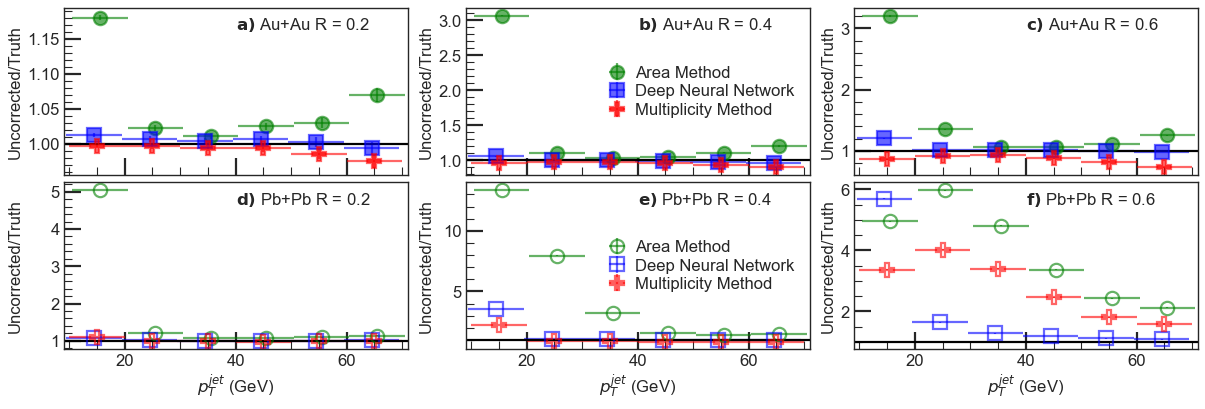

In [90]:
fileUnfoldedR02_pbpb = ROOT.TFile.Open("PbPb_R02/UnfoldedResults.root")
fileUnfoldedR04_pbpb = ROOT.TFile.Open("PbPb_R04/UnfoldedResults.root")
fileUnfoldedR06_pbpb = ROOT.TFile.Open("PbPb_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("hFoldedDNNRatio")
mult_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("hFoldedMultRatio")
mult_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("hFoldedMultRatio")
mult_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("hFoldedMultRatio")
area_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("hFoldedAreaRatio")
area_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("hFoldedAreaRatio")
area_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("hFoldedAreaRatio")

x_area_R02_pbpb, y_area_R02_pbpb, xerr_area_R02_pbpb, yerr_area_R02_pbpb = TH1toMatplot(area_unfolded_ratio_R02_pbpb)
x_area_R04_pbpb, y_area_R04_pbpb, xerr_area_R04_pbpb, yerr_area_R04_pbpb = TH1toMatplot(area_unfolded_ratio_R04_pbpb)
x_area_R06_pbpb, y_area_R06_pbpb, xerr_area_R06_pbpb, yerr_area_R06_pbpb = TH1toMatplot(area_unfolded_ratio_R06_pbpb)
x_mult_R02_pbpb, y_mult_R02_pbpb, xerr_mult_R02_pbpb, yerr_mult_R02_pbpb = TH1toMatplot(mult_unfolded_ratio_R02_pbpb)
x_mult_R04_pbpb, y_mult_R04_pbpb, xerr_mult_R04_pbpb, yerr_mult_R04_pbpb = TH1toMatplot(mult_unfolded_ratio_R04_pbpb)
x_mult_R06_pbpb, y_mult_R06_pbpb, xerr_mult_R06_pbpb, yerr_mult_R06_pbpb = TH1toMatplot(mult_unfolded_ratio_R06_pbpb)
x_dnn_R02_pbpb, y_dnn_R02_pbpb, xerr_dnn_R02_pbpb, yerr_dnn_R02_pbpb = TH1toMatplot(dnn_unfolded_ratio_R02_pbpb)
x_dnn_R04_pbpb, y_dnn_R04_pbpb, xerr_dnn_R04_pbpb, yerr_dnn_R04_pbpb = TH1toMatplot(dnn_unfolded_ratio_R04_pbpb)
x_dnn_R06_pbpb, y_dnn_R06_pbpb, xerr_dnn_R06_pbpb, yerr_dnn_R06_pbpb = TH1toMatplot(dnn_unfolded_ratio_R06_pbpb)

fileUnfoldedR02 = ROOT.TFile.Open("AuAu_R02/UnfoldedResults.root")
fileUnfoldedR04 = ROOT.TFile.Open("AuAu_R04/UnfoldedResults.root")
fileUnfoldedR06 = ROOT.TFile.Open("AuAu_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedDNNRatio")
dnn_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedDNNRatio")
mult_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedMultRatio")
mult_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedMultRatio")
mult_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedMultRatio")
area_unfolded_ratio_R02 = fileUnfoldedR02.Get("hFoldedAreaRatio")
area_unfolded_ratio_R04 = fileUnfoldedR04.Get("hFoldedAreaRatio")
area_unfolded_ratio_R06 = fileUnfoldedR06.Get("hFoldedAreaRatio")

x_area_R02, y_area_R02, xerr_area_R02, yerr_area_R02 = TH1toMatplot(area_unfolded_ratio_R02)
x_area_R04, y_area_R04, xerr_area_R04, yerr_area_R04 = TH1toMatplot(area_unfolded_ratio_R04)
x_area_R06, y_area_R06, xerr_area_R06, yerr_area_R06 = TH1toMatplot(area_unfolded_ratio_R06)
x_mult_R02, y_mult_R02, xerr_mult_R02, yerr_mult_R02 = TH1toMatplot(mult_unfolded_ratio_R02)
x_mult_R04, y_mult_R04, xerr_mult_R04, yerr_mult_R04 = TH1toMatplot(mult_unfolded_ratio_R04)
x_mult_R06, y_mult_R06, xerr_mult_R06, yerr_mult_R06 = TH1toMatplot(mult_unfolded_ratio_R06)
x_dnn_R02, y_dnn_R02, xerr_dnn_R02, yerr_dnn_R02 = TH1toMatplot(dnn_unfolded_ratio_R02)
x_dnn_R04, y_dnn_R04, xerr_dnn_R04, yerr_dnn_R04 = TH1toMatplot(dnn_unfolded_ratio_R04)
x_dnn_R06, y_dnn_R06, xerr_dnn_R06, yerr_dnn_R06 = TH1toMatplot(dnn_unfolded_ratio_R06)

font_size = 15
marker_size = 12

label_style = dict(fontsize=font_size)

area_style = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='green', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method',capsize=0)
dnn_style = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network',capsize=0)
mult_style = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='red', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method',capsize=0)

area_style_pbpb = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='none', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method',capsize=0)
dnn_style_pbpb  = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='none', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network',capsize=0)
mult_style_pbpb  = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='none', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method',capsize=0)
legend_style = dict(fontsize=font_size, frameon=False, ncol=1, markerscale=1, labelspacing=0.2, handletextpad=0.1, columnspacing=0.2)

def format_axes(ax):
    ax.tick_params(labelsize=font_size)
    ax.set_ylabel("Uncorrected/Truth", **label_style)
    ax.minorticks_on()
    ax.tick_params('both', length=15, width=2, which='major', direction='in')
    ax.tick_params('both', length=7, width=1, which='minor', direction='in')

area_offset = [x_area_R02[i]+0.5 for i in range(len(x_area_R02))]
dnn_offset = [x_dnn_R02[i]-0.5 for i in range(len(x_dnn_R02))]
mult_offset = x_mult_R02
xaxis = area_offset

area_offsetR04 = [x_area_R04[i]+0.5 for i in range(len(x_area_R04))]
dnn_offsetR04 = [x_dnn_R04[i]-0.5 for i in range(len(x_dnn_R04))]
mult_offsetR04 = x_mult_R04
xaxisR04 = area_offsetR04

area_offsetR06 = [x_area_R06[i]+0.5 for i in range(len(x_area_R06))]
dnn_offsetR06 = [x_dnn_R06[i]-0.5 for i in range(len(x_dnn_R06))]
mult_offsetR06 = x_mult_R06
xaxisR06 = area_offsetR06

area_offsetR02_pbpb = [x_area_R02_pbpb[i]+0.5 for i in range(len(x_area_R02_pbpb))]
dnn_offsetR02_pbpb = [x_dnn_R02_pbpb[i]-0.5 for i in range(len(x_dnn_R02_pbpb))]
mult_offsetR02_pbpb = x_mult_R02_pbpb
xaxis = area_offsetR02_pbpb

area_offsetR04_pbpb = [x_area_R04_pbpb[i]+0.5 for i in range(len(x_area_R04_pbpb))]
dnn_offsetR04_pbpb = [x_dnn_R04_pbpb[i]-0.5 for i in range(len(x_dnn_R04_pbpb))]
mult_offsetR04_pbpb = x_mult_R04_pbpb
xaxisR04_pbpb = area_offsetR04_pbpb

area_offsetR06_pbpb = [x_area_R06_pbpb[i]+0.5 for i in range(len(x_area_R06_pbpb))]
dnn_offsetR06_pbpb = [x_dnn_R06_pbpb[i]-0.5 for i in range(len(x_dnn_R06_pbpb))]
mult_offsetR06_pbpb = x_mult_R06_pbpb
xaxisR06_pbpb = area_offsetR06_pbpb

fig = plt.figure(figsize=(15, 5), dpi=80,constrained_layout=True)
plt.rc('axes', unicode_minus=True)

ax1 = plt.subplot2grid((2,3), (0, 0), colspan=1, rowspan=1)
ax1.errorbar(area_offset, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, **area_style)
ax1.errorbar(dnn_offset, y_dnn_R02, xerr=xerr_dnn_R02, yerr=yerr_dnn_R02, **dnn_style)
ax1.errorbar(mult_offset, y_mult_R02, xerr=xerr_mult_R02, yerr=yerr_mult_R02, **mult_style)
ax1.text(0.5, 0.95, r'$\bf{a)}$ Au+Au R = 0.2 ', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.plot([0-.5,area_offset[-1]+xerr_area_R02[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax2 = plt.subplot2grid((2,3), (0, 1), colspan=1, rowspan=1)
ax2.errorbar(area_offsetR04, y_area_R04, xerr=xerr_area_R04, yerr=yerr_area_R04, **area_style)
ax2.errorbar(dnn_offsetR04, y_dnn_R04, xerr=xerr_dnn_R04, yerr=yerr_dnn_R04, **dnn_style)
ax2.errorbar(mult_offsetR04, y_mult_R04, xerr=xerr_mult_R04, yerr=yerr_mult_R04, **mult_style)
ax2.text(0.5,0.95, r'$\bf{b)}$ Au+Au R = 0.4', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax2.plot([0-.5,area_offsetR04[-1]+xerr_area_R04[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax3 = plt.subplot2grid((2,3), (0, 2), colspan=1, rowspan=1)
ax3.errorbar(area_offsetR06, y_area_R06, xerr=xerr_area_R06, yerr=yerr_area_R06, **area_style)
ax3.errorbar(dnn_offsetR06, y_dnn_R06, xerr=xerr_dnn_R06, yerr=yerr_dnn_R06, **dnn_style)
ax3.errorbar(mult_offsetR06, y_mult_R06, xerr=xerr_mult_R06, yerr=yerr_mult_R06, **mult_style)
ax3.text(0.5, 0.95, r'$\bf{c)}$ Au+Au R = 0.6 ', transform=ax3.transAxes, fontsize=font_size, verticalalignment='top')
ax3.plot([0-.5,area_offsetR06[-1]+xerr_area_R06[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax4 = plt.subplot2grid((2,3), (1, 0), colspan=1, rowspan=1,sharex=ax1)
ax4.errorbar(area_offsetR02_pbpb, y_area_R02_pbpb, xerr=xerr_area_R02_pbpb, yerr=yerr_area_R02_pbpb, **area_style_pbpb)
ax4.errorbar(dnn_offsetR02_pbpb, y_dnn_R02_pbpb, xerr=xerr_dnn_R02_pbpb, yerr=yerr_dnn_R02_pbpb, **dnn_style_pbpb)
ax4.errorbar(mult_offsetR02_pbpb, y_mult_R02_pbpb, xerr=xerr_mult_R02_pbpb, yerr=yerr_mult_R02_pbpb, **mult_style_pbpb)
ax4.text(0.5, 0.95, r'$\bf{d)}$ Pb+Pb R = 0.2 ', transform=ax4.transAxes, fontsize=font_size, verticalalignment='top')
ax4.plot([0-.5,area_offsetR02_pbpb[-1]+xerr_area_R02_pbpb[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax5 = plt.subplot2grid((2,3), (1, 1), colspan=1, rowspan=1,sharex=ax2)
ax5.errorbar(area_offsetR04_pbpb, y_area_R04_pbpb, xerr=xerr_area_R04_pbpb, yerr=yerr_area_R04_pbpb, **area_style_pbpb)
ax5.errorbar(dnn_offsetR04_pbpb, y_dnn_R04_pbpb, xerr=xerr_dnn_R04_pbpb, yerr=yerr_dnn_R04_pbpb, **dnn_style_pbpb)
ax5.errorbar(mult_offsetR04_pbpb, y_mult_R04_pbpb, xerr=xerr_mult_R04_pbpb, yerr=yerr_mult_R04_pbpb, **mult_style_pbpb)
ax5.text(0.5, 0.95, r'$\bf{e)}$ Pb+Pb R = 0.4 ', transform=ax5.transAxes, fontsize=font_size, verticalalignment='top')
ax5.plot([0-.5,area_offsetR04_pbpb[-1]+xerr_area_R04_pbpb[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax6 = plt.subplot2grid((2,3), (1, 2), colspan=1, rowspan=1,sharex=ax3)
ax6.errorbar(area_offsetR06_pbpb, y_area_R06_pbpb, xerr=xerr_area_R06_pbpb, yerr=yerr_area_R06_pbpb, **area_style_pbpb)
ax6.errorbar(dnn_offsetR06_pbpb, y_dnn_R06_pbpb, xerr=xerr_dnn_R06_pbpb, yerr=yerr_dnn_R06_pbpb, **dnn_style_pbpb)
ax6.errorbar(mult_offsetR06_pbpb, y_mult_R06_pbpb, xerr=xerr_mult_R06_pbpb, yerr=yerr_mult_R06_pbpb, **mult_style_pbpb)
ax6.text(0.5, 0.95, r'$\bf{f)}$ Pb+Pb R = 0.6 ', transform=ax6.transAxes, fontsize=font_size, verticalalignment='top')
ax6.plot([0-.5,area_offsetR06_pbpb[-1]+xerr_area_R06_pbpb[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax4.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
ax5.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
ax6.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
# ax1.set_ylim(0.1,1.5)
# ax2.set_ylim(0.1,4.5)
# ax3.set_ylim(0.1,4.5)
# ax4.set_ylim(0.0,5.5)
ax4.set_xlim(9,71)
ax5.set_xlim(9,71)
ax6.set_xlim(9,71)
format_axes(ax1)
format_axes(ax2)
format_axes(ax3)
format_axes(ax4)
format_axes(ax5)
format_axes(ax6)
ax2.legend(loc='center right', **legend_style)
ax5.legend(loc='center right', **legend_style)
ax1.tick_params(labelbottom=False)
ax2.tick_params(labelbottom=False)
ax3.tick_params(labelbottom=False)
fig.align_ylabels()

plt.show()


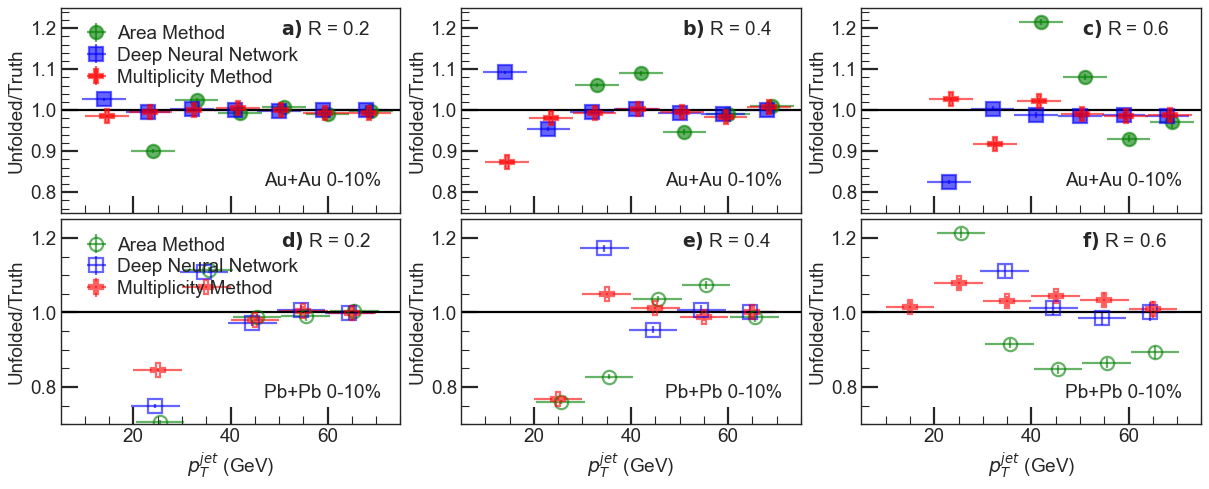

In [26]:
def TH1toMatplot(hist):
    x = []
    y = []
    xerr = []
    yerr = []
    for i in range(1, hist.GetNbinsX()+1):
        x.append(hist.GetBinLowEdge(i))
        y.append(hist.GetBinContent(i))
        xerr.append(hist.GetBinWidth(i))
        yerr.append(hist.GetBinError(i))
    x.append(hist.GetBinLowEdge(hist.GetNbinsX()+1))
    xerr = [(x[i+1]-x[i])/2 for i in range(len(x)-1)] 
    x = [(x[i+1]+x[i])/2 for i in range(len(x)-1)]  
     
    #print('shapes', len(x), len(y), len(xerr), len(yerr))
    # impose max pt cut
    nX = 0
    for i in range(len(x)):
        if x[i] < 70:
            nX += 1
    x = x[:nX]
    y = y[:nX]
    xerr = xerr[:nX]
    yerr = yerr[:nX]
    
    return x, y, xerr, yerr

fileUnfoldedR02_pbpb = ROOT.TFile.Open("PbPb_R02/UnfoldedResults.root")
fileUnfoldedR04_pbpb = ROOT.TFile.Open("PbPb_R04/UnfoldedResults.root")
fileUnfoldedR06_pbpb = ROOT.TFile.Open("PbPb_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("UnfoldedDNNRatio_9")
dnn_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("UnfoldedDNNRatio_9")
dnn_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("UnfoldedDNNRatio_9")
mult_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("UnfoldedMultRatio_9")
mult_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("UnfoldedMultRatio_8")
mult_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("UnfoldedMultRatio_9")
area_unfolded_ratio_R02_pbpb = fileUnfoldedR02_pbpb.Get("UnfoldedAreaRatio_9")
area_unfolded_ratio_R04_pbpb = fileUnfoldedR04_pbpb.Get("UnfoldedAreaRatio_9")
area_unfolded_ratio_R06_pbpb = fileUnfoldedR06_pbpb.Get("UnfoldedAreaRatio_9")

x_area_R02_pbpb, y_area_R02_pbpb, xerr_area_R02_pbpb, yerr_area_R02_pbpb = TH1toMatplot(area_unfolded_ratio_R02_pbpb)
x_area_R04_pbpb, y_area_R04_pbpb, xerr_area_R04_pbpb, yerr_area_R04_pbpb = TH1toMatplot(area_unfolded_ratio_R04_pbpb)
x_area_R06_pbpb, y_area_R06_pbpb, xerr_area_R06_pbpb, yerr_area_R06_pbpb = TH1toMatplot(area_unfolded_ratio_R06_pbpb)
x_mult_R02_pbpb, y_mult_R02_pbpb, xerr_mult_R02_pbpb, yerr_mult_R02_pbpb = TH1toMatplot(mult_unfolded_ratio_R02_pbpb)
x_mult_R04_pbpb, y_mult_R04_pbpb, xerr_mult_R04_pbpb, yerr_mult_R04_pbpb = TH1toMatplot(mult_unfolded_ratio_R04_pbpb)
x_mult_R06_pbpb, y_mult_R06_pbpb, xerr_mult_R06_pbpb, yerr_mult_R06_pbpb = TH1toMatplot(mult_unfolded_ratio_R06_pbpb)
x_dnn_R02_pbpb, y_dnn_R02_pbpb, xerr_dnn_R02_pbpb, yerr_dnn_R02_pbpb = TH1toMatplot(dnn_unfolded_ratio_R02_pbpb)
x_dnn_R04_pbpb, y_dnn_R04_pbpb, xerr_dnn_R04_pbpb, yerr_dnn_R04_pbpb = TH1toMatplot(dnn_unfolded_ratio_R04_pbpb)
x_dnn_R06_pbpb, y_dnn_R06_pbpb, xerr_dnn_R06_pbpb, yerr_dnn_R06_pbpb = TH1toMatplot(dnn_unfolded_ratio_R06_pbpb)

fileUnfoldedR02 = ROOT.TFile.Open("AuAu_R02/UnfoldedResults.root")
fileUnfoldedR04 = ROOT.TFile.Open("AuAu_R04/UnfoldedResults.root")
fileUnfoldedR06 = ROOT.TFile.Open("AuAu_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02 = fileUnfoldedR02.Get("UnfoldedDNNRatio_9")
dnn_unfolded_ratio_R04 = fileUnfoldedR04.Get("UnfoldedDNNRatio_9")
dnn_unfolded_ratio_R06 = fileUnfoldedR06.Get("UnfoldedDNNRatio_9")
mult_unfolded_ratio_R02 = fileUnfoldedR02.Get("UnfoldedMultRatio_9")
mult_unfolded_ratio_R04 = fileUnfoldedR04.Get("UnfoldedMultRatio_8")
mult_unfolded_ratio_R06 = fileUnfoldedR06.Get("UnfoldedMultRatio_9")
area_unfolded_ratio_R02 = fileUnfoldedR02.Get("UnfoldedAreaRatio_9")
area_unfolded_ratio_R04 = fileUnfoldedR04.Get("UnfoldedAreaRatio_9")
area_unfolded_ratio_R06 = fileUnfoldedR06.Get("UnfoldedAreaRatio_9")

x_area_R02, y_area_R02, xerr_area_R02, yerr_area_R02 = TH1toMatplot(area_unfolded_ratio_R02)
x_area_R04, y_area_R04, xerr_area_R04, yerr_area_R04 = TH1toMatplot(area_unfolded_ratio_R04)
x_area_R06, y_area_R06, xerr_area_R06, yerr_area_R06 = TH1toMatplot(area_unfolded_ratio_R06)
x_mult_R02, y_mult_R02, xerr_mult_R02, yerr_mult_R02 = TH1toMatplot(mult_unfolded_ratio_R02)
x_mult_R04, y_mult_R04, xerr_mult_R04, yerr_mult_R04 = TH1toMatplot(mult_unfolded_ratio_R04)
x_mult_R06, y_mult_R06, xerr_mult_R06, yerr_mult_R06 = TH1toMatplot(mult_unfolded_ratio_R06)
x_dnn_R02, y_dnn_R02, xerr_dnn_R02, yerr_dnn_R02 = TH1toMatplot(dnn_unfolded_ratio_R02)
x_dnn_R04, y_dnn_R04, xerr_dnn_R04, yerr_dnn_R04 = TH1toMatplot(dnn_unfolded_ratio_R04)
x_dnn_R06, y_dnn_R06, xerr_dnn_R06, yerr_dnn_R06 = TH1toMatplot(dnn_unfolded_ratio_R06)

font_size = 17
marker_size = 12

label_style = dict(fontsize=font_size)

area_style = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='green', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method',capsize=0)
dnn_style = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network',capsize=0)
mult_style = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='red', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method',capsize=0)

area_style_pbpb = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='none', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method',capsize=0)
dnn_style_pbpb  = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='none', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network',capsize=0)
mult_style_pbpb  = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='none', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method',capsize=0)
legend_style = dict(fontsize=font_size, frameon=False, ncol=1, markerscale=1, labelspacing=0.2, handletextpad=0.1, columnspacing=0.2)

def format_axes(ax):
    ax.tick_params(labelsize=font_size)
    ax.set_ylabel("Unfolded/Truth", **label_style)
    ax.minorticks_on()
    ax.tick_params('both', length=15, width=2, which='major', direction='in')
    ax.tick_params('both', length=7, width=1, which='minor', direction='in')

area_offset = [x_area_R02[i]+0.5 for i in range(len(x_area_R02))]
dnn_offset = [x_dnn_R02[i]-0.5 for i in range(len(x_dnn_R02))]
mult_offset = x_mult_R02
xaxis = area_offset

area_offsetR04 = [x_area_R04[i]+0.5 for i in range(len(x_area_R04))]
dnn_offsetR04 = [x_dnn_R04[i]-0.5 for i in range(len(x_dnn_R04))]
mult_offsetR04 = x_mult_R04
xaxisR04 = area_offsetR04

area_offsetR06 = [x_area_R06[i]+0.5 for i in range(len(x_area_R06))]
dnn_offsetR06 = [x_dnn_R06[i]-0.5 for i in range(len(x_dnn_R06))]
mult_offsetR06 = x_mult_R06
xaxisR06 = area_offsetR06

area_offsetR02_pbpb = [x_area_R02_pbpb[i]+0.5 for i in range(len(x_area_R02_pbpb))]
dnn_offsetR02_pbpb = [x_dnn_R02_pbpb[i]-0.5 for i in range(len(x_dnn_R02_pbpb))]
mult_offsetR02_pbpb = x_mult_R02_pbpb
xaxis = area_offsetR02_pbpb

area_offsetR04_pbpb = [x_area_R04_pbpb[i]+0.5 for i in range(len(x_area_R04_pbpb))]
dnn_offsetR04_pbpb = [x_dnn_R04_pbpb[i]-0.5 for i in range(len(x_dnn_R04_pbpb))]
mult_offsetR04_pbpb = x_mult_R04_pbpb
xaxisR04_pbpb = area_offsetR04_pbpb

area_offsetR06_pbpb = [x_area_R06_pbpb[i]+0.5 for i in range(len(x_area_R06_pbpb))]
dnn_offsetR06_pbpb = [x_dnn_R06_pbpb[i]-0.5 for i in range(len(x_dnn_R06_pbpb))]
mult_offsetR06_pbpb = x_mult_R06_pbpb
xaxisR06_pbpb = area_offsetR06_pbpb

fig = plt.figure(figsize=(15, 6), dpi=80,constrained_layout=True)
plt.rc('axes', unicode_minus=True)

ax1 = plt.subplot2grid((2,3), (0, 0), colspan=1, rowspan=1)
ax1.errorbar(area_offset, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, **area_style)
ax1.errorbar(dnn_offset, y_dnn_R02, xerr=xerr_dnn_R02, yerr=yerr_dnn_R02, **dnn_style)
ax1.errorbar(mult_offset, y_mult_R02, xerr=xerr_mult_R02, yerr=yerr_mult_R02, **mult_style)
ax1.text(0.65, 0.95, r'$\bf{a)}$ R = 0.2 ', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.plot([0-.5,80],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax2 = plt.subplot2grid((2,3), (0, 1), colspan=1, rowspan=1)
ax2.errorbar(area_offsetR04, y_area_R04, xerr=xerr_area_R04, yerr=yerr_area_R04, **area_style)
ax2.errorbar(dnn_offsetR04, y_dnn_R04, xerr=xerr_dnn_R04, yerr=yerr_dnn_R04, **dnn_style)
ax2.errorbar(mult_offsetR04, y_mult_R04, xerr=xerr_mult_R04, yerr=yerr_mult_R04, **mult_style)
ax2.text(0.65,0.95, r'$\bf{b)}$ R = 0.4', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax2.plot([0-.5,80],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax3 = plt.subplot2grid((2,3), (0, 2), colspan=1, rowspan=1)
ax3.errorbar(area_offsetR06, y_area_R06, xerr=xerr_area_R06, yerr=yerr_area_R06, **area_style)
ax3.errorbar(dnn_offsetR06, y_dnn_R06, xerr=xerr_dnn_R06, yerr=yerr_dnn_R06, **dnn_style)
ax3.errorbar(mult_offsetR06, y_mult_R06, xerr=xerr_mult_R06, yerr=yerr_mult_R06, **mult_style)
ax3.text(0.65, 0.95, r'$\bf{c)}$ R = 0.6 ', transform=ax3.transAxes, fontsize=font_size, verticalalignment='top')
ax3.plot([0-.5,80],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax4 = plt.subplot2grid((2,3), (1, 0), colspan=1, rowspan=1,sharex=ax1)
ax4.errorbar(area_offsetR02_pbpb, y_area_R02_pbpb, xerr=xerr_area_R02_pbpb, yerr=yerr_area_R02_pbpb, **area_style_pbpb)
ax4.errorbar(dnn_offsetR02_pbpb, y_dnn_R02_pbpb, xerr=xerr_dnn_R02_pbpb, yerr=yerr_dnn_R02_pbpb, **dnn_style_pbpb)
ax4.errorbar(mult_offsetR02_pbpb, y_mult_R02_pbpb, xerr=xerr_mult_R02_pbpb, yerr=yerr_mult_R02_pbpb, **mult_style_pbpb)
ax4.text(0.65, 0.95, r'$\bf{d)}$ R = 0.2 ', transform=ax4.transAxes, fontsize=font_size, verticalalignment='top')
ax4.plot([0-.5,80],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax5 = plt.subplot2grid((2,3), (1, 1), colspan=1, rowspan=1,sharex=ax2)
ax5.errorbar(area_offsetR04_pbpb, y_area_R04_pbpb, xerr=xerr_area_R04_pbpb, yerr=yerr_area_R04_pbpb, **area_style_pbpb)
ax5.errorbar(dnn_offsetR04_pbpb, y_dnn_R04_pbpb, xerr=xerr_dnn_R04_pbpb, yerr=yerr_dnn_R04_pbpb, **dnn_style_pbpb)
ax5.errorbar(mult_offsetR04_pbpb, y_mult_R04_pbpb, xerr=xerr_mult_R04_pbpb, yerr=yerr_mult_R04_pbpb, **mult_style_pbpb)
ax5.text(0.65, 0.95, r'$\bf{e)}$ R = 0.4 ', transform=ax5.transAxes, fontsize=font_size, verticalalignment='top')
ax5.plot([0-.5,80],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax6 = plt.subplot2grid((2,3), (1, 2), colspan=1, rowspan=1,sharex=ax3)
ax6.errorbar(area_offsetR06_pbpb, y_area_R06_pbpb, xerr=xerr_area_R06_pbpb, yerr=yerr_area_R06_pbpb, **area_style_pbpb)
ax6.errorbar(dnn_offsetR06_pbpb, y_dnn_R06_pbpb, xerr=xerr_dnn_R06_pbpb, yerr=yerr_dnn_R06_pbpb, **dnn_style_pbpb)
ax6.errorbar(mult_offsetR06_pbpb, y_mult_R06_pbpb, xerr=xerr_mult_R06_pbpb, yerr=yerr_mult_R06_pbpb, **mult_style_pbpb)
ax6.text(0.65, 0.95, r'$\bf{f)}$ R = 0.6 ', transform=ax6.transAxes, fontsize=font_size, verticalalignment='top')
ax6.plot([0-.5,80],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax4.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
ax5.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
ax6.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
ax1.set_ylim(0.75,1.25)
ax2.set_ylim(0.75,1.25)
ax3.set_ylim(0.75,1.25)
ax4.set_ylim(0.7,1.25)
ax5.set_ylim(0.7,1.25)
ax6.set_ylim(0.7,1.25)
ax4.set_xlim(5,75)
ax5.set_xlim(5,75)
ax6.set_xlim(5,75)
ax1.text(0.6, 0.2, r'Au+Au 0-10%', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax2.text(0.6, 0.2, r'Au+Au 0-10%', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax3.text(0.6, 0.2, r'Au+Au 0-10%', transform=ax3.transAxes, fontsize=font_size, verticalalignment='top')
ax4.text(0.6, 0.2, r'Pb+Pb 0-10%', transform=ax4.transAxes, fontsize=font_size, verticalalignment='top')
ax5.text(0.6, 0.2, r'Pb+Pb 0-10%', transform=ax5.transAxes, fontsize=font_size, verticalalignment='top')
ax6.text(0.6, 0.2, r'Pb+Pb 0-10%', transform=ax6.transAxes, fontsize=font_size, verticalalignment='top')
format_axes(ax1)
format_axes(ax2)
format_axes(ax3)
format_axes(ax4)
format_axes(ax5)
format_axes(ax6)
ax1.legend(loc='upper left', **legend_style)
ax4.legend(loc='upper left', **legend_style)
ax1.tick_params(labelbottom=False)
ax2.tick_params(labelbottom=False)
ax3.tick_params(labelbottom=False)
fig.align_ylabels()

plt.show()
fig.savefig('jet_unfolded_ratio.pdf')

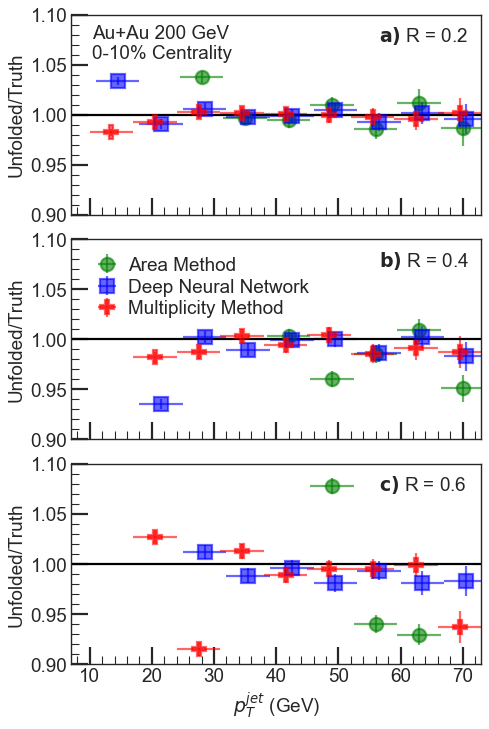

In [43]:
fileUnfoldedR02 = ROOT.TFile.Open("AuAu_R02/UnfoldedResults.root")
fileUnfoldedR04 = ROOT.TFile.Open("AuAu_R04/UnfoldedResults.root")
fileUnfoldedR06 = ROOT.TFile.Open("AuAu_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02 = fileUnfoldedR02.Get("UnfoldedDNNRatio_9")
dnn_unfolded_ratio_R04 = fileUnfoldedR04.Get("UnfoldedDNNRatio_9")
dnn_unfolded_ratio_R06 = fileUnfoldedR06.Get("UnfoldedDNNRatio_9")
mult_unfolded_ratio_R02 = fileUnfoldedR02.Get("UnfoldedMultRatio_9")
mult_unfolded_ratio_R04 = fileUnfoldedR04.Get("UnfoldedMultRatio_8")
mult_unfolded_ratio_R06 = fileUnfoldedR06.Get("UnfoldedMultRatio_9")
area_unfolded_ratio_R02 = fileUnfoldedR02.Get("UnfoldedAreaRatio_9")
area_unfolded_ratio_R04 = fileUnfoldedR04.Get("UnfoldedAreaRatio_9")
area_unfolded_ratio_R06 = fileUnfoldedR06.Get("UnfoldedAreaRatio_9")

x_area_R02, y_area_R02, xerr_area_R02, yerr_area_R02 = TH1toMatplot(area_unfolded_ratio_R02)
x_area_R04, y_area_R04, xerr_area_R04, yerr_area_R04 = TH1toMatplot(area_unfolded_ratio_R04)
x_area_R06, y_area_R06, xerr_area_R06, yerr_area_R06 = TH1toMatplot(area_unfolded_ratio_R06)
x_mult_R02, y_mult_R02, xerr_mult_R02, yerr_mult_R02 = TH1toMatplot(mult_unfolded_ratio_R02)
x_mult_R04, y_mult_R04, xerr_mult_R04, yerr_mult_R04 = TH1toMatplot(mult_unfolded_ratio_R04)
x_mult_R06, y_mult_R06, xerr_mult_R06, yerr_mult_R06 = TH1toMatplot(mult_unfolded_ratio_R06)
x_dnn_R02, y_dnn_R02, xerr_dnn_R02, yerr_dnn_R02 = TH1toMatplot(dnn_unfolded_ratio_R02)
x_dnn_R04, y_dnn_R04, xerr_dnn_R04, yerr_dnn_R04 = TH1toMatplot(dnn_unfolded_ratio_R04)
x_dnn_R06, y_dnn_R06, xerr_dnn_R06, yerr_dnn_R06 = TH1toMatplot(dnn_unfolded_ratio_R06)

font_size = 17
marker_size = 12

label_style = dict(fontsize=font_size)
area_style = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='green', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method',capsize=0)
dnn_style = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network',capsize=0)
mult_style = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='red', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method',capsize=0)
legend_style = dict(fontsize=font_size, frameon=False, ncol=1, markerscale=1, labelspacing=0.2, handletextpad=0.1, columnspacing=0.2)

def format_axes(ax):
    ax.tick_params(labelsize=font_size)
    # ax.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
    ax.set_ylabel("Unfolded/Truth", **label_style)
    ax.minorticks_on()
    ax.tick_params('both', length=15, width=2, which='major', direction='in')
    ax.tick_params('both', length=7, width=1, which='minor', direction='in')

area_offset = [x_area_R02[i]+0.5 for i in range(len(x_area_R02))]
dnn_offset = [x_dnn_R02[i]+1.0 for i in range(len(x_dnn_R02))]
mult_offset = x_mult_R02
xaxis = area_offset

area_offsetR04 = [x_area_R04[i]+0.5 for i in range(len(x_area_R04))]
dnn_offsetR04 = [x_dnn_R04[i]+1.0 for i in range(len(x_dnn_R04))]
mult_offsetR04 = x_mult_R04
xaxisR04 = area_offsetR04

area_offsetR06 = [x_area_R06[i]+0.5 for i in range(len(x_area_R06))]
dnn_offsetR06 = [x_dnn_R06[i]+1.0 for i in range(len(x_dnn_R06))]
mult_offsetR06 = x_mult_R06
xaxisR06 = area_offsetR06

fig = plt.figure(figsize=(6, 9), dpi=80,constrained_layout=True)
ax1 = plt.subplot2grid((3, 1), (0, 0), colspan=1, rowspan=1)
plt.rc('axes', unicode_minus=False)

ax1.errorbar(area_offset, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, **area_style)
ax1.errorbar(dnn_offset, y_dnn_R02, xerr=xerr_dnn_R02, yerr=yerr_dnn_R02, **dnn_style)
ax1.errorbar(mult_offset, y_mult_R02, xerr=xerr_mult_R02, yerr=yerr_mult_R02, **mult_style)

ax1.text(0.75, 0.95, r'$\bf{a)}$ R = 0.2 ', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.set_xlim(0-.5,area_offset[-1]+xerr_area_R02[-1]+0.5)
# ax1.set_xlim(5,60)
ax1.set_ylim(0.9,1.1)
ax1.plot([0-.5,area_offset[-1]+xerr_area_R02[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')
ax1.text(0.05, 0.95, r'Au+Au 200 GeV', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.text(0.05, 0.85, r'0-10% Centrality', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')

format_axes(ax1)

ax2 = plt.subplot2grid((3,1), (1, 0), colspan=1, rowspan=1,sharex=ax1)

ax2.errorbar(area_offsetR04, y_area_R04, xerr=xerr_area_R04, yerr=yerr_area_R04, **area_style)
ax2.errorbar(dnn_offsetR04, y_dnn_R04, xerr=xerr_dnn_R04, yerr=yerr_dnn_R04, **dnn_style)
ax2.errorbar(mult_offsetR04, y_mult_R04, xerr=xerr_mult_R04, yerr=yerr_mult_R04, **mult_style)

ax2.text(0.75, 0.95, r'$\bf{b)}$ R = 0.4 ', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax2.set_xlim(0-.5,area_offsetR04[-1]+xerr_area_R04[-1]+0.5)
ax2.plot([0-.5,area_offsetR04[-1]+xerr_area_R04[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')
ax2.set_ylim(0.9,1.1)

format_axes(ax2)


ax3 = plt.subplot2grid((3,1), (2, 0), colspan=1, rowspan=1,sharex=ax1)

ax3.errorbar(area_offsetR06, y_area_R06, xerr=xerr_area_R06, yerr=yerr_area_R06, **area_style)
ax3.errorbar(dnn_offsetR06, y_dnn_R06, xerr=xerr_dnn_R06, yerr=yerr_dnn_R06, **dnn_style)
ax3.errorbar(mult_offsetR06, y_mult_R06, xerr=xerr_mult_R06, yerr=yerr_mult_R06, **mult_style)

ax3.text(0.75, 0.95, r'$\bf{c)}$ R = 0.6 ', transform=ax3.transAxes, fontsize=font_size, verticalalignment='top')
ax3.set_xlim(0-.5,area_offsetR06[-1]+xerr_area_R06[-1]+0.5)
ax3.plot([0-.5,area_offsetR06[-1]+xerr_area_R06[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')
ax3.set_ylim(0.9,1.1)
ax3.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
format_axes(ax3)
ax1.set_xlim(7,73)
ax2.legend(loc='upper left', **legend_style)
ax1.tick_params(labelbottom=False)
ax2.tick_params(labelbottom=False)

plt.show()

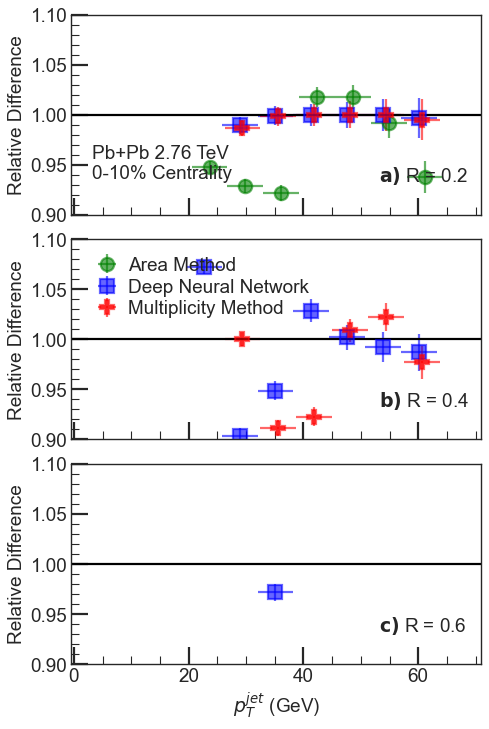

In [44]:
fileUnfoldedR02 = ROOT.TFile.Open("PbPb_R02/UnfoldedResults.root")
fileUnfoldedR04 = ROOT.TFile.Open("PbPb_R04/UnfoldedResults.root")
fileUnfoldedR06 = ROOT.TFile.Open("PbPb_R06/UnfoldedResults.root")

dnn_unfolded_ratio_R02 = fileUnfoldedR02.Get("UnfoldedDNNRatio_8")
dnn_unfolded_ratio_R04 = fileUnfoldedR04.Get("UnfoldedDNNRatio_8")
dnn_unfolded_ratio_R06 = fileUnfoldedR06.Get("UnfoldedDNNRatio_8")
mult_unfolded_ratio_R02 = fileUnfoldedR02.Get("UnfoldedMultRatio_8")
mult_unfolded_ratio_R04 = fileUnfoldedR04.Get("UnfoldedMultRatio_8")
mult_unfolded_ratio_R06 = fileUnfoldedR06.Get("UnfoldedMultRatio_8")
area_unfolded_ratio_R02 = fileUnfoldedR02.Get("UnfoldedAreaRatio_8")
area_unfolded_ratio_R04 = fileUnfoldedR04.Get("UnfoldedAreaRatio_8")
area_unfolded_ratio_R06 = fileUnfoldedR06.Get("UnfoldedAreaRatio_8")

x_area_R02, y_area_R02, xerr_area_R02, yerr_area_R02 = TH1toMatplot(area_unfolded_ratio_R02)
x_area_R04, y_area_R04, xerr_area_R04, yerr_area_R04 = TH1toMatplot(area_unfolded_ratio_R04)
x_area_R06, y_area_R06, xerr_area_R06, yerr_area_R06 = TH1toMatplot(area_unfolded_ratio_R06)
x_mult_R02, y_mult_R02, xerr_mult_R02, yerr_mult_R02 = TH1toMatplot(mult_unfolded_ratio_R02)
x_mult_R04, y_mult_R04, xerr_mult_R04, yerr_mult_R04 = TH1toMatplot(mult_unfolded_ratio_R04)
x_mult_R06, y_mult_R06, xerr_mult_R06, yerr_mult_R06 = TH1toMatplot(mult_unfolded_ratio_R06)
x_dnn_R02, y_dnn_R02, xerr_dnn_R02, yerr_dnn_R02 = TH1toMatplot(dnn_unfolded_ratio_R02)
x_dnn_R04, y_dnn_R04, xerr_dnn_R04, yerr_dnn_R04 = TH1toMatplot(dnn_unfolded_ratio_R04)
x_dnn_R06, y_dnn_R06, xerr_dnn_R06, yerr_dnn_R06 = TH1toMatplot(dnn_unfolded_ratio_R06)

font_size = 17
marker_size = 12

label_style = dict(fontsize=font_size)
area_style = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='green', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method',capsize=0)
dnn_style = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network',capsize=0)
mult_style = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='red', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method',capsize=0)
legend_style = dict(fontsize=font_size, frameon=False, ncol=1, markerscale=1, labelspacing=0.2, handletextpad=0.1, columnspacing=0.2)

def format_axes(ax):
    ax.tick_params(labelsize=font_size)
    # ax.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
    ax.set_ylabel("Relative Difference", **label_style)
    ax.minorticks_on()
    ax.tick_params('both', length=15, width=2, which='major', direction='in')
    ax.tick_params('both', length=7, width=1, which='minor', direction='in')

area_offset = [x_area_R02[i]+0.5 for i in range(len(x_area_R02))]
dnn_offset = [x_dnn_R02[i]-0.5 for i in range(len(x_dnn_R02))]
mult_offset = x_mult_R02
xaxis = area_offset

area_offsetR04 = [x_area_R04[i]+0.5 for i in range(len(x_area_R04))]
dnn_offsetR04 = [x_dnn_R04[i]-0.5 for i in range(len(x_dnn_R04))]
mult_offsetR04 = x_mult_R04
xaxisR04 = area_offsetR04

area_offsetR06 = [x_area_R06[i]+0.5 for i in range(len(x_area_R06))]
dnn_offsetR06 = [x_dnn_R06[i]-0.5 for i in range(len(x_dnn_R06))]
mult_offsetR06 = x_mult_R06
xaxisR06 = area_offsetR06

fig = plt.figure(figsize=(6, 9), dpi=80,constrained_layout=True)
ax1 = plt.subplot2grid((3, 1), (0, 0), colspan=1, rowspan=1)
plt.rc('axes', unicode_minus=False)

ax1.errorbar(area_offset, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, **area_style)
ax1.errorbar(dnn_offset, y_dnn_R02, xerr=xerr_dnn_R02, yerr=yerr_dnn_R02, **dnn_style)
ax1.errorbar(mult_offset, y_mult_R02, xerr=xerr_mult_R02, yerr=yerr_mult_R02, **mult_style)

ax1.text(0.75, 0.25, r'$\bf{a)}$ R = 0.2 ', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.set_xlim(0-.5,area_offset[-1]+xerr_area_R02[-1]+0.5)
ax1.plot([0-.5,area_offset[-1]+xerr_area_R02[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')
ax1.text(0.05, 0.35, r'Pb+Pb 2.76 TeV', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.text(0.05, 0.25, r'0-10% Centrality', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')

ax2 = plt.subplot2grid((3,1), (1, 0), colspan=1, rowspan=1,sharex=ax1)

ax2.errorbar(area_offsetR04, y_area_R04, xerr=xerr_area_R04, yerr=yerr_area_R04, **area_style)
ax2.errorbar(dnn_offsetR04, y_dnn_R04, xerr=xerr_dnn_R04, yerr=yerr_dnn_R04, **dnn_style)
ax2.errorbar(mult_offsetR04, y_mult_R04, xerr=xerr_mult_R04, yerr=yerr_mult_R04, **mult_style)

ax2.text(0.75, 0.25, r'$\bf{b)}$ R = 0.4 ', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
ax2.set_xlim(0-.5,area_offsetR04[-1]+xerr_area_R04[-1]+0.5)
ax2.plot([0-.5,area_offsetR04[-1]+xerr_area_R04[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')

ax3 = plt.subplot2grid((3,1), (2, 0), colspan=1, rowspan=1,sharex=ax1)

ax3.errorbar(area_offsetR06, y_area_R06, xerr=xerr_area_R06, yerr=yerr_area_R06, **area_style)
ax3.errorbar(dnn_offsetR06, y_dnn_R06, xerr=xerr_dnn_R06, yerr=yerr_dnn_R06, **dnn_style)
ax3.errorbar(mult_offsetR06, y_mult_R06, xerr=xerr_mult_R06, yerr=yerr_mult_R06, **mult_style)

ax3.text(0.75, 0.25, r'$\bf{c)}$ R = 0.6 ', transform=ax3.transAxes, fontsize=font_size, verticalalignment='top')
ax3.set_xlim(0-.5,area_offsetR06[-1]+xerr_area_R06[-1]+0.5)
ax3.plot([0-.5,area_offsetR06[-1]+xerr_area_R06[-1]+0.5],[1,1], color='black', alpha=1.0, linewidth=2, linestyle='-')
ax3.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
ax2.legend(loc='best', **legend_style)

ax1.set_ylim(0.9,1.1)
ax2.set_ylim(0.9,1.1)
ax3.set_ylim(0.9,1.1)
format_axes(ax1)
format_axes(ax2)
format_axes(ax3)
ax1.tick_params(labelbottom=False)
ax2.tick_params(labelbottom=False)

plt.show()

In [65]:
fileUnfoldedR02 = ROOT.TFile.Open("AuAu_R02/UnfoldedResultsSys.root")
fileUnfoldedR04 = ROOT.TFile.Open("AuAu_R04/UnfoldedResultsSys.root")
fileUnfoldedR06 = ROOT.TFile.Open("AuAu_R06/UnfoldedResultsSys.root")

spectra_dnn_unfolded_R02 = fileUnfoldedR02.Get("UnfoldedDNN_8").Clone()
spectra_dnn_unfolded_R04 = fileUnfoldedR04.Get("UnfoldedDNN_8").Clone()
spectra_dnn_unfolded_R06 = fileUnfoldedR06.Get("UnfoldedDNN_8").Clone()

spectra_area_unfolded_R02 = fileUnfoldedR02.Get("UnfoldedArea_8").Clone()
spectra_area_unfolded_R04 = fileUnfoldedR04.Get("UnfoldedArea_8").Clone()
spectra_area_unfolded_R06 = fileUnfoldedR06.Get("UnfoldedArea_8").Clone()

spectra_mult_unfolded_R02 = fileUnfoldedR02.Get("UnfoldedMult_8").Clone()
spectra_mult_unfolded_R04 = fileUnfoldedR04.Get("UnfoldedMult_8").Clone()
spectra_mult_unfolded_R06 = fileUnfoldedR06.Get("UnfoldedMult_8").Clone()

spectra_truth_unfolded_R02 = fileUnfoldedR02.Get("pT_spectrum_truth_closure").Clone()
spectra_truth_unfolded_R04 = fileUnfoldedR04.Get("pT_spectrum_truth_closure").Clone()
spectra_truth_unfolded_R06 = fileUnfoldedR06.Get("pT_spectrum_truth_closure").Clone()


def FormatSpec(spec, color, marker, title):
    spec.SetMarkerColor(color)
    spec.SetLineColor(color)
    spec.SetFillColorAlpha(color, 0.3)
    spec.SetFillStyle(3001)
    spec.SetMarkerStyle(marker)
    spec.SetMarkerSize(1.5)
    spec.SetTitle(title)
    spec.GetXaxis().SetTitle("p_{T} (GeV/c)")
    spec.GetYaxis().SetTitle("dN/dp_{T} (GeV/c)^{-1}")
    spec.GetYaxis().SetTitleOffset(1.5)
    spec.SetLineWidth(2)
   # spec.Scale(1.0/spec.Integral())
    return spec

def FormatTruth(spec, color, title):
    spec.SetLineColor(color)
    spec.SetTitle(title)
    spec.GetXaxis().SetTitle("p_{T} (GeV/c)")
    spec.GetYaxis().SetTitle("dN/dp_{T} (GeV/c)^{-1}")
    spec.GetYaxis().SetTitleOffset(1.5)
    spec.SetLineWidth(2)
    spec.SetLineStyle(2)
   # spec.Scale(1.0/spec.Integral())
    return spec

def GetRatio(spec1, spec2):
    spec = spec1.Clone()
    spec.Divide(spec2)
    return spec


spectra_dnn_unfolded_R02 = FormatSpec(spectra_dnn_unfolded_R02, ROOT.kBlue, ROOT.kFullSquare, "DNN")
spectra_dnn_unfolded_R04 = FormatSpec(spectra_dnn_unfolded_R04, ROOT.kBlue, ROOT.kFullSquare, "DNN")
spectra_dnn_unfolded_R06 = FormatSpec(spectra_dnn_unfolded_R06, ROOT.kBlue, ROOT.kFullSquare, "DNN")

spectra_area_unfolded_R02 = FormatSpec(spectra_area_unfolded_R02, ROOT.kGreen, ROOT.kFullCircle, "Area")
spectra_area_unfolded_R04 = FormatSpec(spectra_area_unfolded_R04, ROOT.kGreen, ROOT.kFullCircle, "Area")
spectra_area_unfolded_R06 = FormatSpec(spectra_area_unfolded_R06, ROOT.kGreen, ROOT.kFullCircle, "Area")

spectra_mult_unfolded_R02 = FormatSpec(spectra_mult_unfolded_R02, ROOT.kRed, ROOT.kFullCross, "Mult")
spectra_mult_unfolded_R04 = FormatSpec(spectra_mult_unfolded_R04, ROOT.kRed, ROOT.kFullCross, "Mult")
spectra_mult_unfolded_R06 = FormatSpec(spectra_mult_unfolded_R06, ROOT.kRed, ROOT.kFullCross, "Mult")

spectra_truth_unfolded_R02 = FormatTruth(spectra_truth_unfolded_R02, ROOT.kBlack, "Truth")
spectra_truth_unfolded_R04 = FormatTruth(spectra_truth_unfolded_R04, ROOT.kBlack, "Truth")
spectra_truth_unfolded_R06 = FormatTruth(spectra_truth_unfolded_R06, ROOT.kBlack, "Truth")

dnn_ratio_R02 = GetRatio(spectra_dnn_unfolded_R02, spectra_truth_unfolded_R02)
area_ratio_R02 = GetRatio(spectra_area_unfolded_R02, spectra_truth_unfolded_R02)
mult_ratio_R02 = GetRatio(spectra_mult_unfolded_R02, spectra_truth_unfolded_R02)
truth_ratio_R02 = GetRatio(spectra_truth_unfolded_R02, spectra_truth_unfolded_R02)

dnn_ratio_R04 = GetRatio(spectra_dnn_unfolded_R04, spectra_truth_unfolded_R04)
area_ratio_R04 = GetRatio(spectra_area_unfolded_R04, spectra_truth_unfolded_R04)
mult_ratio_R04 = GetRatio(spectra_mult_unfolded_R04, spectra_truth_unfolded_R04)
truth_ratio_R04 = GetRatio(spectra_truth_unfolded_R04, spectra_truth_unfolded_R04)

dnn_ratio_R06 = GetRatio(spectra_dnn_unfolded_R06, spectra_truth_unfolded_R06)
area_ratio_R06 = GetRatio(spectra_area_unfolded_R06, spectra_truth_unfolded_R06)
mult_ratio_R06 = GetRatio(spectra_mult_unfolded_R06, spectra_truth_unfolded_R06)
truth_ratio_R06 = GetRatio(spectra_truth_unfolded_R06, spectra_truth_unfolded_R06)


ReferenceError: attempt to access a null-pointer

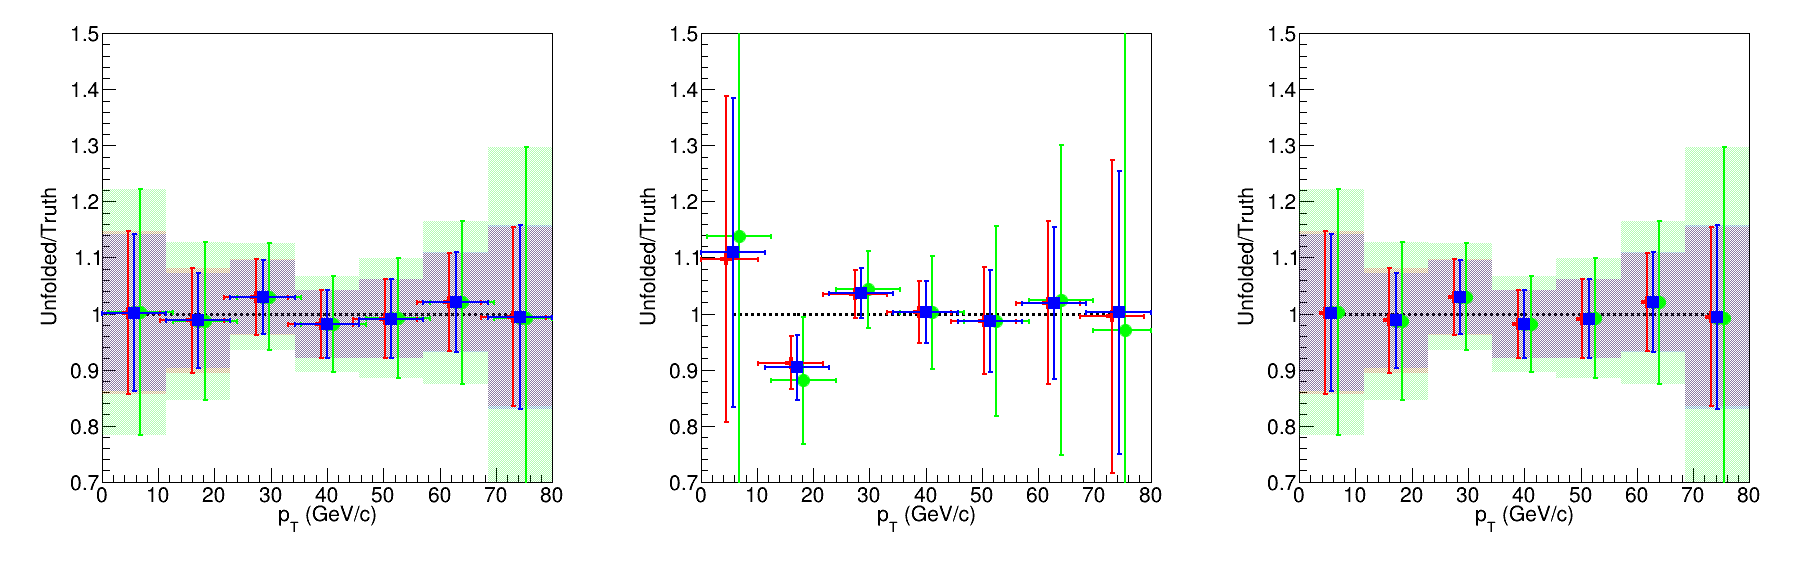

In [3]:
def FormatAxisPlot(hist):
    hist.GetXaxis().SetRangeUser(0, 70)
    hist.GetYaxis().SetRangeUser(0.7, 1.5)
    hist.GetYaxis().SetTitle("Unfolded/Truth")
    hist.GetYaxis().CenterTitle()
    hist.GetXaxis().CenterTitle()
    hist.SetMarkerStyle(0)
    hist.SetLineWidth(3)
    hist.SetLineStyle(2)
    hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
    hist.GetYaxis().SetTitleOffset(1.5)
    hist.GetYaxis().SetLabelSize(0.04)
    hist.GetXaxis().SetLabelSize(0.04)
    hist.GetYaxis().SetTitleSize(0.04)
    hist.GetXaxis().SetTitleSize(0.04)
    return hist

c1 = ROOT.TCanvas("c1", "c1", 1800, 600)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1.Divide(3, 1)
c1.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetTopMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)

truth_ratio_R02 = FormatAxisPlot(truth_ratio_R02)
truth_ratio_R02.Draw("l")
area_ratio_R02_stats = area_ratio_R02.Clone()
area_ratio_R02_stats.Draw("e2 same")
mult_ratio_R02_stats = mult_ratio_R02.Clone()
mult_ratio_R02_stats.Draw("e2 same")
dnn_ratio_R02_stats = dnn_ratio_R02.Clone()
dnn_ratio_R02_stats.Draw("e2 same")
area_ratio_R02.Draw("p E1 same")
area_ratio_R02.SetBarOffset(0.1)
mult_ratio_R02.Draw("p E1 same")
mult_ratio_R02.SetBarOffset(-0.1)
dnn_ratio_R02.Draw("p E1 same")

c1.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetTopMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)
truth_ratio_R04 = FormatAxisPlot(truth_ratio_R04)
truth_ratio_R04.Draw("l")
# area_ratio_R04_stats = area_ratio_R04.Clone()
# area_ratio_R04_stats.Draw("e2 same")
# mult_ratio_R04_stats = mult_ratio_R04.Clone()
# mult_ratio_R04_stats.Draw("e2 same")
# dnn_ratio_R04_stats = dnn_ratio_R04.Clone()
# dnn_ratio_R04_stats.Draw("e2 same")
area_ratio_R04.Draw("p E1 same")
area_ratio_R04.SetBarOffset(0.1)
mult_ratio_R04.Draw("p E1 same")
mult_ratio_R04.SetBarOffset(-0.1)
dnn_ratio_R04.Draw("p E1 same")

c1.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetTopMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)

truth_ratio_R06 = FormatAxisPlot(truth_ratio_R06)
truth_ratio_R06.Draw("l")
area_ratio_R06_stats = area_ratio_R06.Clone()
area_ratio_R06_stats.Draw("e2 same")
mult_ratio_R06_stats = mult_ratio_R06.Clone()
mult_ratio_R06_stats.Draw("e2 same")
dnn_ratio_R06_stats = dnn_ratio_R06.Clone()
dnn_ratio_R06_stats.Draw("e2 same")
area_ratio_R06.Draw("p E1 X0 same")
area_ratio_R06.SetBarOffset(0.1)
mult_ratio_R06.Draw("p E1 X0 same")
mult_ratio_R06.SetBarOffset(-0.1)
dnn_ratio_R06.Draw("p E1 X0 same")



c1.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


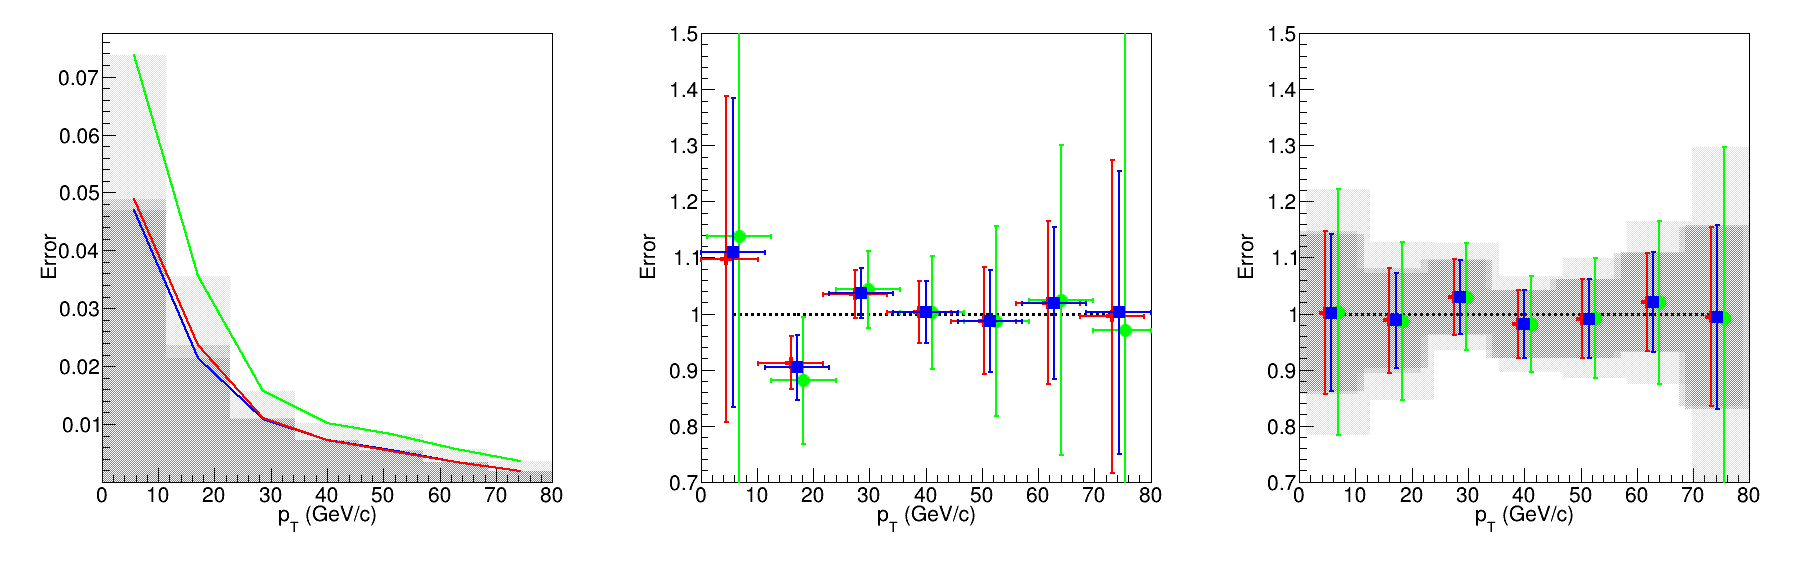

In [13]:
def GetErrorHist(hist):
    errhist = hist.Clone()
    errhist.Scale(1/errhist.Integral())
    for i in range(1, errhist.GetNbinsX()+1):
        errhist.SetBinContent(i, errhist.GetBinError(i))
        errhist.SetBinError(i, 0)
    return errhist

def FormatAxisPlot(hist):
    hist.GetXaxis().SetRangeUser(0, 80)
    hist.GetYaxis().SetTitle("Error")
    hist.GetYaxis().CenterTitle()
    hist.GetXaxis().CenterTitle()
    hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
    hist.GetYaxis().SetTitleOffset(1.5)
    hist.GetYaxis().SetLabelSize(0.04)
    hist.GetXaxis().SetLabelSize(0.04)
    hist.GetYaxis().SetTitleSize(0.04)
    hist.GetXaxis().SetTitleSize(0.04)
    return hist

c1 = ROOT.TCanvas("c1", "c1", 1800, 600)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1.Divide(3, 1)
c1.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetTopMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)

error_area_R02 = GetErrorHist(spectra_area_unfolded_R02)
error_area_R02 = FormatAxisPlot(error_area_R02)
error_dnn_R02 = GetErrorHist(spectra_dnn_unfolded_R02)
error_mult_R02 = GetErrorHist(spectra_mult_unfolded_R02)
error_area_R02.Draw("l ")
error_dnn_R02.Draw("l same")
error_mult_R02.Draw("l same")



c1.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetTopMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)
truth_ratio_R04 = FormatAxisPlot(truth_ratio_R04)
truth_ratio_R04.Draw("l")
# area_ratio_R04_stats = area_ratio_R04.Clone()
# area_ratio_R04_stats.Draw("e2 same")
# mult_ratio_R04_stats = mult_ratio_R04.Clone()
# mult_ratio_R04_stats.Draw("e2 same")
# dnn_ratio_R04_stats = dnn_ratio_R04.Clone()
# dnn_ratio_R04_stats.Draw("e2 same")
area_ratio_R04.Draw("p E1 same")
area_ratio_R04.SetBarOffset(0.1)
mult_ratio_R04.Draw("p E1 same")
mult_ratio_R04.SetBarOffset(-0.1)
dnn_ratio_R04.Draw("p E1 same")

c1.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetTopMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)

truth_ratio_R06 = FormatAxisPlot(truth_ratio_R06)
truth_ratio_R06.Draw("l")
area_ratio_R06_stats = area_ratio_R06.Clone()
area_ratio_R06_stats.Draw("e2 same")
mult_ratio_R06_stats = mult_ratio_R06.Clone()
mult_ratio_R06_stats.Draw("e2 same")
dnn_ratio_R06_stats = dnn_ratio_R06.Clone()
dnn_ratio_R06_stats.Draw("e2 same")
area_ratio_R06.Draw("p E1 X0 same")
area_ratio_R06.SetBarOffset(0.1)
mult_ratio_R06.Draw("p E1 X0 same")
mult_ratio_R06.SetBarOffset(-0.1)
dnn_ratio_R06.Draw("p E1 X0 same")



c1.Draw()


In [46]:
def TH1toMatplot(hist):
    x = []
    y = []
    xerr = []
    yerr = []
    for i in range(1, hist.GetNbinsX()+1):
        x.append(hist.GetBinCenter(i))
        y.append(hist.GetBinContent(i))
        xerr.append(hist.GetBinWidth(i)/2)
        yerr.append(hist.GetBinError(i))
    return x, y, xerr, yerr

x_area_R02, y_area_R02, xerr_area_R02, yerr_area_R02 = TH1toMatplot(area_ratio_R02)
x_mult_R02, y_mult_R02, xerr_mult_R02, yerr_mult_R02 = TH1toMatplot(mult_ratio_R02)
x_dnn_R02, y_dnn_R02, xerr_dnn_R02, yerr_dnn_R02 = TH1toMatplot(dnn_ratio_R02)

x_area_R04, y_area_R04, xerr_area_R04, yerr_area_R04 = TH1toMatplot(area_ratio_R04)
x_mult_R04, y_mult_R04, xerr_mult_R04, yerr_mult_R04 = TH1toMatplot(mult_ratio_R04)
x_dnn_R04, y_dnn_R04, xerr_dnn_R04, yerr_dnn_R04 = TH1toMatplot(dnn_ratio_R04)

x_area_R06, y_area_R06, xerr_area_R06, yerr_area_R06 = TH1toMatplot(area_ratio_R06)
x_mult_R06, y_mult_R06, xerr_mult_R06, yerr_mult_R06 = TH1toMatplot(mult_ratio_R06)
x_dnn_R06, y_dnn_R06, xerr_dnn_R06, yerr_dnn_R06 = TH1toMatplot(dnn_ratio_R06)


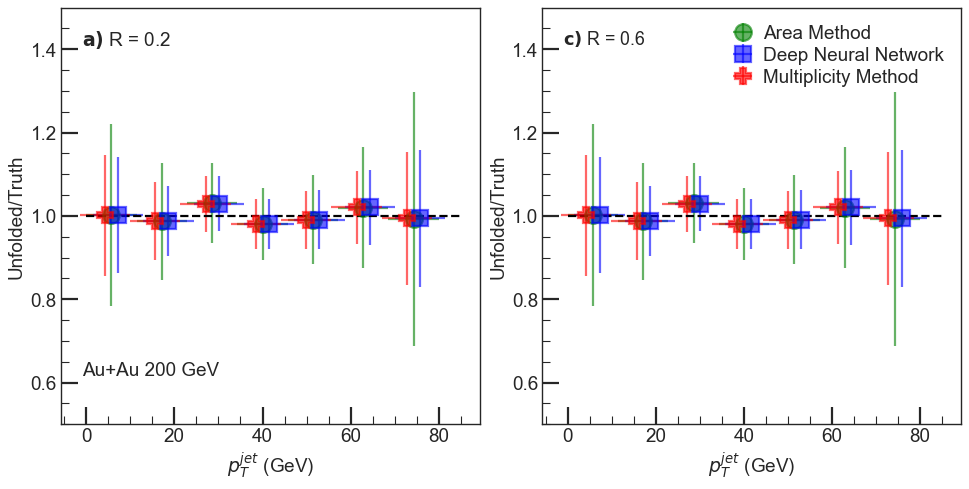

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import matplotlib.transforms as mtransforms

font_size = 17
marker_size = 15
label_style = dict(fontsize=font_size)

area_style = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='green', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method')
dnn_style = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network')
mult_style = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='red', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method')

legend_style = dict(fontsize=font_size, frameon=False, ncol=1, markerscale=1, labelspacing=0.2, handletextpad=0.1, columnspacing=0.2)

def format_axes(ax):
    ax.tick_params(labelsize=font_size)
    ax.set_ylim(0.5, 1.5)
    ax.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
    ax.set_ylabel("Unfolded/Truth", **label_style)
    ax.minorticks_on()
    ax.tick_params('both', length=15, width=2, which='major', direction='in')
    ax.tick_params('both', length=7, width=1, which='minor', direction='in')

    
fig = plt.figure(figsize=(12, 6), dpi=80,constrained_layout=True)
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax1.errorbar(x_area_R02, y_area_R02, xerr=xerr_area_R02, yerr=yerr_area_R02, **area_style)
# shift the x error bars by 0.1
x_dnn_R02=np.array(x_dnn_R02)+1.5
x_mult_R02=np.array(x_mult_R02)-1.5
ax1.errorbar(x_dnn_R02, y_dnn_R02, xerr=xerr_dnn_R02, yerr=yerr_dnn_R02, **dnn_style)   
ax1.errorbar(x_mult_R02, y_mult_R02, xerr=xerr_mult_R02, yerr=yerr_mult_R02, **mult_style)
ax1.plot([0, 85], [1, 1], color='black', linestyle='--', linewidth=2)
#ax1.legend(**legend_style, loc='best')
ax1.text(0.05, 0.95, r'$\bf{a)}$ R = 0.2 ', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.text(0.05, 0.15, r'Au+Au 200 GeV', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
format_axes(ax1)

ax3 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
ax3.errorbar(x_area_R06, y_area_R06, xerr=xerr_area_R06, yerr=yerr_area_R06, **area_style)
# shift the x error bars by 0.1
x_dnn_R06=np.array(x_dnn_R06)+1.5
x_mult_R06=np.array(x_mult_R06)-1.5
ax3.errorbar(x_dnn_R06, y_dnn_R06, xerr=xerr_dnn_R06, yerr=yerr_dnn_R06, **dnn_style)
ax3.errorbar(x_mult_R06, y_mult_R06, xerr=xerr_mult_R06, yerr=yerr_mult_R06, **mult_style)
ax3.plot([0, 85], [1, 1], color='black', linestyle='--', linewidth=2)
ax3.text(0.05, 0.95, r'$\bf{c)}$ R = 0.6', transform=ax3.transAxes, fontsize=font_size-1, verticalalignment='top')
ax3.legend(**legend_style, loc='best')
format_axes(ax3)

plt.show()
fig.savefig('method_momentum_residuals_AuAu.pdf', bbox_inches='tight')

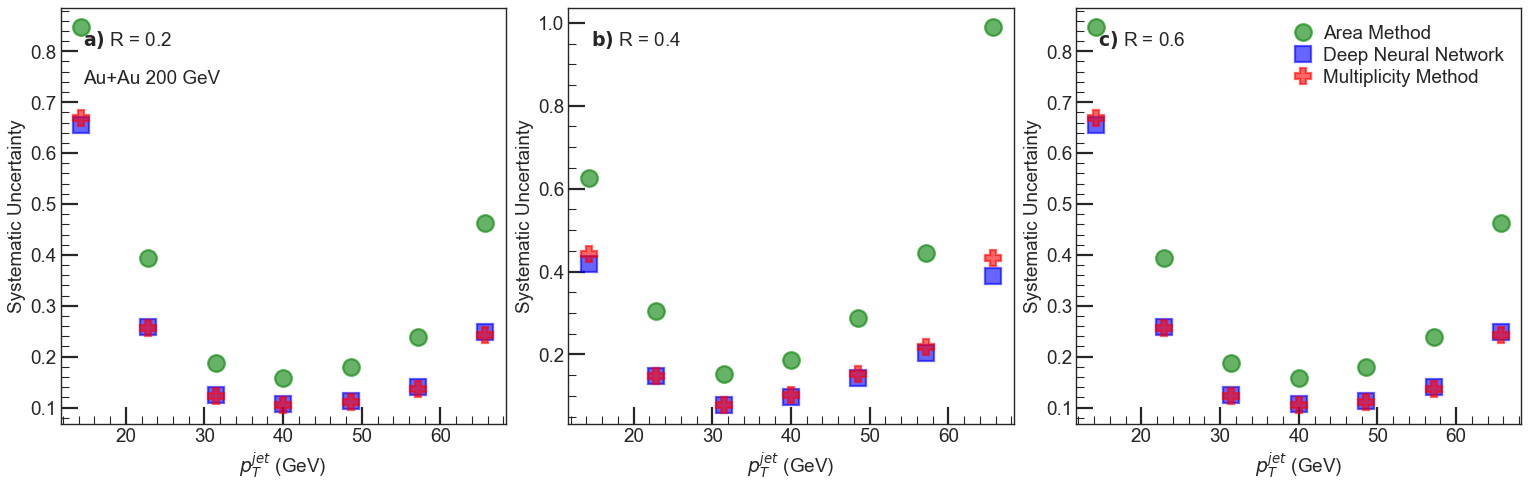

In [78]:
font_size = 17
marker_size = 15
label_style = dict(fontsize=font_size)

area_style = dict(color='green', linestyle='', linewidth=2,  marker='o', markersize=marker_size, markerfacecolor='green', markeredgecolor='green', markeredgewidth=2, alpha=0.6, label='Area Method')
dnn_style = dict(color='blue', linestyle='', linewidth=2,  marker='s', markersize=marker_size, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=2, alpha=0.6, label='Deep Neural Network')
mult_style = dict(color='red', linestyle='', linewidth=2,  marker='P', markersize=marker_size, markerfacecolor='red', markeredgecolor='red', markeredgewidth=2, alpha=0.6, label='Multiplicity Method')

legend_style = dict(fontsize=font_size, frameon=False, ncol=1, markerscale=1, labelspacing=0.2, handletextpad=0.1, columnspacing=0.2)

def format_axes(ax):
    ax.tick_params(labelsize=font_size)
    ax.set_xlabel(r"$p_{T}^{jet}$ (GeV)", **label_style)
    ax.set_ylabel("Systematic Uncertainty", **label_style)
    ax.minorticks_on()
    ax.tick_params('both', length=15, width=2, which='major', direction='in')
    ax.tick_params('both', length=7, width=1, which='minor', direction='in')

    
fig = plt.figure(figsize=(19, 6), dpi=80,constrained_layout=True)
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=1, rowspan=1)
ax1.plot(x_area_R02, yerr_area_R02, **area_style)
ax1.plot(x_dnn_R02, yerr_dnn_R02, **dnn_style)
ax1.plot(x_mult_R02, yerr_mult_R02, **mult_style)
#ax1.legend(**legend_style, loc='best')
ax1.text(0.05, 0.95, r'$\bf{a)}$ R = 0.2 ', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
ax1.text(0.05, 0.85, r'Au+Au 200 GeV', transform=ax1.transAxes, fontsize=font_size, verticalalignment='top')
format_axes(ax1)
# ax1.set_ylim(0,6)
# ax1.legend(handles=[ax1.lines[0], ax1.lines[1], ax1.lines[2]], labels=["Deep Neural Network", "Area Method", "Multiplicity Method"], **legend_style, loc='upper right',title='Au+Au 200 GeV', title_fontsize=font_size)

ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=1, rowspan=1)
ax2.plot(x_area_R04, yerr_area_R04, **area_style)
ax2.plot(x_dnn_R04, yerr_dnn_R04, **dnn_style)
ax2.plot(x_mult_R04, yerr_mult_R04, **mult_style)
ax2.text(0.05, 0.95, r'$\bf{b)}$ R = 0.4 ', transform=ax2.transAxes, fontsize=font_size, verticalalignment='top')
format_axes(ax2)
# ax2.legend(**legend_style, loc='best')
# ax2.set_ylim(0,13)

ax3 = plt.subplot2grid((1, 3), (0, 2), colspan=1, rowspan=1)
ax3.plot(x_area_R06, yerr_area_R06, **area_style)
ax3.plot(x_dnn_R06, yerr_dnn_R06, **dnn_style)
ax3.plot(x_mult_R06, yerr_mult_R06, **mult_style)
ax3.text(0.05, 0.95, r'$\bf{c)}$ R = 0.6', transform=ax3.transAxes, fontsize=font_size, verticalalignment='top')

ax3.legend(**legend_style, loc='best')
format_axes(ax3)

plt.show()
# fig.savefig('method_momentum_residuals_AuAu.pdf', bbox_inches='tight')

In [1]:
import ROOT 
import numpy as np
import pandas as pd
import RooUnfold
import matplotlib.pyplot as plt

filedir_r = "/lustre/isaac/scratch/tmengel/jet-background-subtraction/unfolding/datasets/root-files/AuAu_R02/response/response.root"
filedir_t = "/lustre/isaac/scratch/tmengel/jet-background-subtraction/unfolding/datasets/root-files/AuAu_R02/truth/truth.root"
filedir = "/lustre/isaac/scratch/tmengel/jet-background-subtraction/unfolding/datasets/root-files/AuAu_R02/measurement/measurement.root"

colz = ["jet_pt_dnn_corrected", "jet_pt_truth", "jet_pt_area_corrected", "jet_pt_multiplicity_corrected","jet_eta","jet_eta_truth"]

def get_data(filedir):
    rdf = ROOT.RDataFrame("tree", filedir)
    cols = rdf.GetColumnNames()
    cols_str = [str(col) for col in cols]
    df = pd.DataFrame(rdf.AsNumpy(columns=cols_str))
    return df 

df_response = get_data(filedir_r).copy()
df_truth = get_data(filedir_t).copy()
df_measurement = get_data(filedir).copy()

df_response_fake_jets = df_response[df_response["jet_pt_truth"] < 0.0]
df_response_real_jets = df_response[(df_response["jet_pt_truth"] > 0.0 ) & (np.abs(df_response["jet_eta"]) < 0.5)]
df_response_miss_jets = df_response[(df_response["jet_pt_truth"] > 0.0 ) & (df_response["jet_eta"] == -100)]

print(f"Fakes: {len(df_response_fake_jets)}, Real: {len(df_response_real_jets)}, Miss: {len(df_response_miss_jets)}")

df_measurement_real_jets = df_measurement[(df_measurement["jet_pt_truth"] == -2.0*df_measurement["jet_eta"])]
df_measurement_fake_jets = df_measurement[(df_measurement["jet_pt_truth"] != -2.0*df_measurement["jet_eta"])]
print(f"Fakes: {len(df_measurement_fake_jets)}, Real: {len(df_measurement_real_jets)}")

df_truth_real_jets = df_truth[(df_truth["jet_eta"] != 0.0)]
df_truth_miss_jets = df_truth[(df_truth["jet_pt_area_corrected"] == 0.0) & (df_truth["jet_pt_multiplicity_corrected"] == 0.0) & (df_truth["jet_eta"] == 0.0)]
print(f"Real: {len(df_truth_real_jets)}, Missed: {len(df_truth_miss_jets)}")

Welcome to JupyROOT 6.26/02
Fakes: 1687368, Real: 8007887, Miss: 239431
Fakes: 1687368, Real: 9640533
Real: 9439927, Missed: 239431


In [77]:
# define the binning
n_bins_reco = 12
pt_min_reco = -10.0
pt_max_reco = 80.0
n_bins_reco_dnn = 12
pt_min_reco_dnn = -10.0
# define the binning for truth
n_bins_truth = 12
pt_min_truth = 10.0 
pt_max_truth = 80.0

nominal_fake_fraction = 4.0
high_fake_fraction = 5.0
low_fake_fraction = 3.0
# Number of jets in response matrix
n_real_in_response_matrix = 10000
n_fakes_in_response_matrix = int(nominal_fake_fraction*n_real_in_response_matrix)
# Number of jets in measurement
n_real_in_measurement = n_real_in_response_matrix
# higher and lower fake rate
n_fakes_high_in_measurement = int(high_fake_fraction*n_real_in_measurement)
n_fakes_in_measurement = int(nominal_fake_fraction*n_real_in_measurement)
n_fakes_low_in_measurement = int(low_fake_fraction*n_real_in_measurement)

# Number of jets in truth
n_truth_jets = n_real_in_measurement
# unfolding iterations
niters = 6 

In [78]:
def GetFakeJets(df_real, df_fake, n_real, fake_fraction, ptmin, ptmax, n_bins, truthvar="jet_pt_truth", fakevar="jet_pt_pythia", fracChange=1.0):
    
    fake_jet_bins = np.linspace(0, ptmax, n_bins+1)
    jet_bins = np.linspace(ptmin, ptmax, n_bins+1)
    # Get Counts
    real_counts = df_real.groupby(pd.cut(df_real[truthvar], bins=jet_bins)).size()
    fake_counts = df_fake.groupby(pd.cut(df_fake[fakevar], bins=fake_jet_bins)).size() # use pythia pt for fake jets (no truth pt)
    # Weights
    real_weights = real_counts/real_counts.sum()
    fake_weights = fake_counts/fake_counts.sum()
    
    # Number of jets in each bin
    truth_jets = real_weights*n_real
    n_fakes = fake_fraction*truth_jets[0]/fake_weights[0]   
    n_fakes_high = (fake_fraction+fracChange)*truth_jets[0]/fake_weights[0]
    n_fakes_low = (fake_fraction-fracChange)*truth_jets[0]/fake_weights[0]
    # print("Real df: ", df_real.shape[0], "Fake df: ", df_fake.shape[0])
    # print(f"Real Jets: {n_real}, Fake Jets: {n_fakes}, Fake Jets High: {n_fakes_high}, Fake Jets Low: {n_fakes_low}")
    # # Should be able to sample the corresponding number of jets from each dataframe
    df_truth = df_real[(df_real[truthvar] > ptmin) & (df_real[truthvar] < ptmax)].copy().sample(n=int(n_real))
    df_fake_nom = df_fake.sample(n=int(n_fakes))
    df_fake_high = df_fake.sample(n=int(n_fakes_high))
    df_fake_low = df_fake.sample(n=int(n_fakes_low))
    
    return df_truth, df_fake_nom, df_fake_high, df_fake_low


Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory

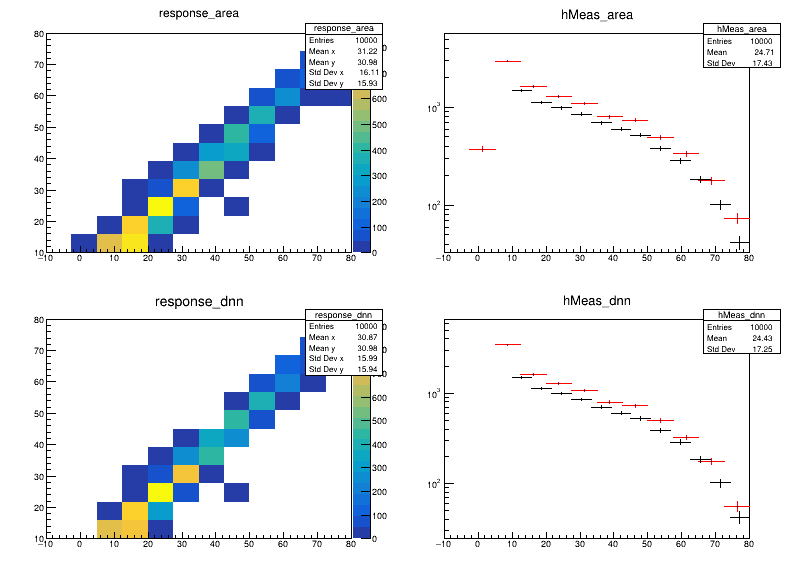

In [89]:
# define histos
hTruth = ROOT.TH1D("hTruth", "hTruth", n_bins_truth, pt_min_truth, pt_max_truth)
# define measurement histos 
hMeas_area = ROOT.TH1F("hMeas_area", "hMeas_area", n_bins_reco, pt_min_reco, pt_max_reco)
hMeas_dnn = ROOT.TH1F("hMeas_dnn", "hMeas_dnn", n_bins_reco_dnn, pt_min_reco_dnn, pt_max_reco)
hMeas_mult = ROOT.TH1F("hMeas_mult", "hMeas_mult", n_bins_reco, pt_min_reco, pt_max_reco)

# define response histos
response_area = ROOT.TH2F("response_area", "response_area", n_bins_reco, pt_min_reco, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)
response_dnn = ROOT.TH2F("response_dnn", "response_dnn", n_bins_reco_dnn, pt_min_reco_dnn, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)
response_mult = ROOT.TH2F("response_mult", "response_mult", n_bins_reco, pt_min_reco, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)

nevents = 10000 
events =  df_response_real_jets.sample(n=nevents, random_state=42)
events_measure = df_response_real_jets.sample(n=nevents, random_state=42)
for index, row in events.iterrows():
    # fill response
    response_area.Fill(row["jet_pt_area_corrected"], row["jet_pt_truth"])
    response_mult.Fill(row["jet_pt_multiplicity_corrected"], row["jet_pt_truth"])
    response_dnn.Fill(row["jet_pt_dnn_corrected"], row["jet_pt_truth"])
    
    hTruth.Fill(row["jet_pt_truth"])

for index, row in events_measure.iterrows():
    # fill measurement
    hMeas_area.Fill(row["jet_pt_area_corrected"])
    hMeas_dnn.Fill(row["jet_pt_dnn_corrected"])
    # fill truth
    # hTruth.Fill(row["jet_pt_truth"])

c = ROOT.TCanvas("c", "c", 800, 600)
c.Divide(2,2)
c.cd(1)
response_area.Draw("colz")

c.cd(2)
ROOT.gPad.SetLogy()
hMeas_area.SetLineColor(ROOT.kRed)
hTruth.SetLineColor(ROOT.kBlack)
hMeas_area.Draw("E")
hTruth.Draw("E SAME")

c.cd(3)
response_dnn.Draw("colz")

c.cd(4)
ROOT.gPad.SetLogy()
hMeas_dnn.SetLineColor(ROOT.kRed)
hTruth.SetLineColor(ROOT.kBlack)
hMeas_dnn.Draw("E")
hTruth.Draw("E SAME")

c.Draw()

Now unfolding...
Iteration : 0
Chi^2 of change 1032.25
Iteration : 1
Chi^2 of change 90.7815
Iteration : 2
Chi^2 of change 40.7626
Iteration : 3
Chi^2 of change 27.4561
Iteration : 4
Chi^2 of change 19.6064
Calculating covariances due to number of measured events
Calculating covariance due to unfolding matrix...
Now unfolding...
Iteration : 0
Chi^2 of change 1050.65
Iteration : 1
Chi^2 of change 99.1778
Iteration : 2
Chi^2 of change 47.0148
Iteration : 3
Chi^2 of change 30.1429
Iteration : 4
Chi^2 of change 20.1253
Calculating covariances due to number of measured events
Calculating covariance due to unfolding matrix...


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


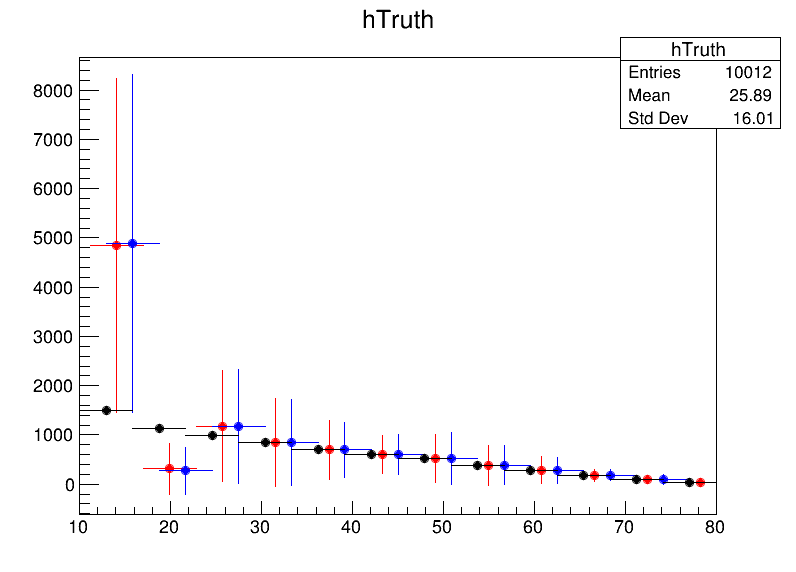

In [93]:
response_matrix_area = ROOT.RooUnfoldResponse(hMeas_area, hTruth,response_area)
response_matrix_dnn = ROOT.RooUnfoldResponse(hMeas_dnn, hTruth,response_dnn)

unfold = ROOT.RooUnfoldBayes(response_matrix_area, hMeas_area, 5)
# unfold = ROOT.RooUnfoldSvd(response_matrix_area, hMeas_area, 4)
unfold.SetNToys(100)
unfold.IncludeSystematics()
hUnhold = unfold.Hunfold(ROOT.RooUnfold.kCovariance)



unfold_dnn = ROOT.RooUnfoldBayes(response_matrix_dnn, hMeas_dnn, 5)
# unfold_dnn = ROOT.RooUnfoldSvd(response_matrix_dnn, hMeas_dnn, 4)
unfold_dnn.SetNToys(100)
unfold_dnn.IncludeSystematics()
hUnhold_dnn = unfold_dnn.Hunfold(ROOT.RooUnfold.kCovariance)

c = ROOT.TCanvas("c", "c", 800, 600)
hUnhold.SetLineColor(ROOT.kRed)
hUnhold.SetMarkerColor(ROOT.kRed)
hUnhold.SetMarkerStyle(20)
hUnhold.SetBarOffset(0.2)
hUnhold.Draw("E")

hUnhold_dnn.SetLineColor(ROOT.kBlue)
hUnhold_dnn.SetMarkerColor(ROOT.kBlue)
hUnhold_dnn.SetMarkerStyle(20)
hUnhold_dnn.SetBarOffset(0.5)
hUnhold_dnn.Draw("E SAME")


hTruth.SetLineColor(ROOT.kBlack)
hTruth.SetMarkerColor(ROOT.kBlack)
hTruth.SetMarkerStyle(20)

hTruth.Draw("E SAME")

c.Draw()

In [66]:
responseEorrors = ROOT.RooUnfoldErrors(2,unfold,unfold_dnn)

TypeError: none of the 2 overloaded methods succeeded. Full details:
  RooUnfoldErrors::RooUnfoldErrors(int NToys, RooUnfoldT<TH1,TH2>* unfold, const TH1* Truth = 0) =>
    TypeError: could not convert argument 3
  RooUnfoldErrors::RooUnfoldErrors(const RooUnfoldErrors&) =>
    TypeError: takes at most 1 arguments (3 given)

In [14]:
# define histos
hTruth = ROOT.TH1D("hTruth", "hTruth", n_bins_truth, pt_min_truth, pt_max_truth)
# define measurement histos 
hMeas_area = ROOT.TH1D("hMeas_area", "hMeas_area", n_bins_reco, pt_min_reco, pt_max_reco)
hMeas_area_high_fake = ROOT.TH1D("hMeas_area_high_fake", "hMeas_area_high_fake", n_bins_reco, pt_min_reco, pt_max_reco)
hMeas_area_low_fake = ROOT.TH1D("hMeas_area_low_fake", "hMeas_area_low_fake", n_bins_reco, pt_min_reco, pt_max_reco)

hMeas_multiplicity = ROOT.TH1D("hMeas_multiplicity", "hMeas_multiplicity", n_bins_reco, pt_min_reco, pt_max_reco)
hMeas_multiplicity_high_fake = ROOT.TH1D("hMeas_multiplicity_high_fake", "hMeas_multiplicity_high_fake", n_bins_reco, pt_min_reco, pt_max_reco)
hMeas_multiplicity_low_fake = ROOT.TH1D("hMeas_multiplicity_low_fake", "hMeas_multiplicity_low_fake", n_bins_reco, pt_min_reco, pt_max_reco)

hMeas_dnn = ROOT.TH1D("hMeas_dnn", "hMeas_dnn", n_bins_reco_dnn, pt_min_reco_dnn, pt_max_reco)
hMeas_dnn_high_fake = ROOT.TH1D("hMeas_dnn_high_fake", "hMeas_dnn_high_fake", n_bins_reco_dnn, pt_min_reco_dnn, pt_max_reco)
hMeas_dnn_low_fake = ROOT.TH1D("hMeas_dnn_low_fake", "hMeas_dnn_low_fake", n_bins_reco_dnn, pt_min_reco_dnn, pt_max_reco)

# define response histos
response_area = ROOT.RooUnfoldResponse(n_bins_reco, pt_min_reco, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)
response_mult = ROOT.RooUnfoldResponse(n_bins_reco, pt_min_reco, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)
response_dnn = ROOT.RooUnfoldResponse(n_bins_reco_dnn, pt_min_reco_dnn, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)

response_area_high_fake = ROOT.RooUnfoldResponse(n_bins_reco, pt_min_reco, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)
response_mult_high_fake = ROOT.RooUnfoldResponse(n_bins_reco, pt_min_reco, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)
response_dnn_high_fake = ROOT.RooUnfoldResponse(n_bins_reco_dnn, pt_min_reco_dnn, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)

response_area_low_fake = ROOT.RooUnfoldResponse(n_bins_reco, pt_min_reco, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)
response_mult_low_fake = ROOT.RooUnfoldResponse(n_bins_reco, pt_min_reco, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)
response_dnn_low_fake = ROOT.RooUnfoldResponse(n_bins_reco_dnn, pt_min_reco_dnn, pt_max_reco, n_bins_truth, pt_min_truth, pt_max_truth)



df_response_real , df_response_fake, df_response_fake_high, df_response_fake_low = GetFakeJets(df_response_real_jets, df_response_fake_jets,
                                                                                               n_real_in_response_matrix,
                                                                                               nominal_fake_fraction,
                                                                                               pt_min_truth, pt_max_truth, n_bins_truth,
                                                                                               truthvar="jet_pt_truth", fakevar="jet_pt_pythia",
                                                                                               fracChange=1.0)

df_measurement_real , df_measurement_fake, df_measurement_fake_high, df_measurement_fake_low = GetFakeJets(df_measurement_real_jets, df_measurement_fake_jets,
                                                                                                            n_real_in_measurement,
                                                                                                            nominal_fake_fraction,
                                                                                                            pt_min_truth, pt_max_truth, n_bins_truth,
                                                                                                            truthvar="jet_pt_pythia", fakevar="jet_pt_pythia",
                                                                                                            fracChange=1.0)

df_truth_real = df_measurement_real


for i in range(len(df_response_real)):
    
    response_area.Fill(df_response_real["jet_pt_area_corrected"].iloc[i], df_response_real["jet_pt_truth"].iloc[i])
    response_dnn.Fill(df_response_real["jet_pt_dnn_corrected"].iloc[i], df_response_real["jet_pt_truth"].iloc[i])
    response_mult.Fill(df_response_real["jet_pt_multiplicity_corrected"].iloc[i], df_response_real["jet_pt_truth"].iloc[i])
    
    response_area_high_fake.Fill(df_response_real["jet_pt_area_corrected"].iloc[i], df_response_real["jet_pt_truth"].iloc[i])
    response_mult_high_fake.Fill(df_response_real["jet_pt_multiplicity_corrected"].iloc[i], df_response_real["jet_pt_truth"].iloc[i])
    response_dnn_high_fake.Fill(df_response_real["jet_pt_dnn_corrected"].iloc[i], df_response_real["jet_pt_truth"].iloc[i])
    
    response_area_low_fake.Fill(df_response_real["jet_pt_area_corrected"].iloc[i], df_response_real["jet_pt_truth"].iloc[i])
    response_mult_low_fake.Fill(df_response_real["jet_pt_multiplicity_corrected"].iloc[i], df_response_real["jet_pt_truth"].iloc[i])
    response_dnn_low_fake.Fill(df_response_real["jet_pt_dnn_corrected"].iloc[i], df_response_real["jet_pt_truth"].iloc[i])
    
    
for i in range(len(df_response_fake)):
    response_area.Fake(df_response_fake["jet_pt_area_corrected"].iloc[i])
    response_dnn.Fake(df_response_fake["jet_pt_dnn_corrected"].iloc[i])
    response_mult.Fake(df_response_fake["jet_pt_multiplicity_corrected"].iloc[i])

for i in range(len(df_response_fake_low)):
    response_area_low_fake.Fake(df_response_fake_low["jet_pt_area_corrected"].iloc[i])
    response_mult_low_fake.Fake(df_response_fake_low["jet_pt_multiplicity_corrected"].iloc[i])
    response_dnn_low_fake.Fake(df_response_fake_low["jet_pt_dnn_corrected"].iloc[i])
    
for i in range(len(df_response_fake_high)):
    response_area_high_fake.Fake(df_response_fake_high["jet_pt_area_corrected"].iloc[i])
    response_mult_high_fake.Fake(df_response_fake_high["jet_pt_multiplicity_corrected"].iloc[i])
    response_dnn_high_fake.Fake(df_response_fake_high["jet_pt_dnn_corrected"].iloc[i])
    
# fill real jets measurement  
for i in range(len(df_measurement_real)):
    
    hMeas_area.Fill(df_measurement_real["jet_pt_area_corrected"].iloc[i])
    hMeas_area_high_fake.Fill(df_measurement_real["jet_pt_area_corrected"].iloc[i])
    hMeas_area_low_fake.Fill(df_measurement_real["jet_pt_area_corrected"].iloc[i])
    
    hMeas_dnn.Fill(df_measurement_real["jet_pt_dnn_corrected"].iloc[i])
    hMeas_dnn_high_fake.Fill(df_measurement_real["jet_pt_dnn_corrected"].iloc[i])
    hMeas_dnn_low_fake.Fill(df_measurement_real["jet_pt_dnn_corrected"].iloc[i])
    
    hMeas_multiplicity.Fill(df_measurement_real["jet_pt_multiplicity_corrected"].iloc[i])
    hMeas_multiplicity_high_fake.Fill(df_measurement_real["jet_pt_multiplicity_corrected"].iloc[i])
    hMeas_multiplicity_low_fake.Fill(df_measurement_real["jet_pt_multiplicity_corrected"].iloc[i])
    
    hTruth.Fill(df_measurement_real["jet_pt_pythia"].iloc[i])
    
for i in range(len(df_measurement_fake_high)):
    hMeas_area_high_fake.Fill(df_measurement_fake_high["jet_pt_area_corrected"].iloc[i])
    hMeas_dnn_high_fake.Fill(df_measurement_fake_high["jet_pt_dnn_corrected"].iloc[i])
    hMeas_multiplicity_high_fake.Fill(df_measurement_fake_high["jet_pt_multiplicity_corrected"].iloc[i])
    
for i in range(len(df_measurement_fake)):
    hMeas_area.Fill(df_measurement_fake["jet_pt_area_corrected"].iloc[i])
    hMeas_dnn.Fill(df_measurement_fake["jet_pt_dnn_corrected"].iloc[i])
    hMeas_multiplicity.Fill(df_measurement_fake["jet_pt_multiplicity_corrected"].iloc[i])    
    
for i in range(len(df_measurement_fake_low)):
    hMeas_area_low_fake.Fill(df_measurement_fake_low["jet_pt_area_corrected"].iloc[i])
    hMeas_dnn_low_fake.Fill(df_measurement_fake_low["jet_pt_dnn_corrected"].iloc[i])
    hMeas_multiplicity_low_fake.Fill(df_measurement_fake_low["jet_pt_multiplicity_corrected"].iloc[i])
    
    
# unfold
unfold_area = ROOT.RooUnfoldBayes(response_area, hMeas_area,niters)
unfold_area_high_fake = ROOT.RooUnfoldBayes(response_area_high_fake, hMeas_area_high_fake,niters)
unfold_area_low_fake = ROOT.RooUnfoldBayes(response_area_low_fake, hMeas_area_low_fake,niters)
unfold_area_regplus = ROOT.RooUnfoldBayes(response_area, hMeas_area,niters+1)
unfold_area_regminus = ROOT.RooUnfoldBayes(response_area, hMeas_area,niters-1)

# dnn
unfold_dnn = ROOT.RooUnfoldBayes(response_dnn, hMeas_dnn,niters)
unfold_dnn_high_fake = ROOT.RooUnfoldBayes(response_dnn_high_fake, hMeas_dnn_high_fake,niters)
unfold_dnn_low_fake = ROOT.RooUnfoldBayes(response_dnn_low_fake, hMeas_dnn_low_fake,niters)
unfold_dnn_regplus = ROOT.RooUnfoldBayes(response_dnn, hMeas_dnn,niters+1)
unfold_dnn_regminus = ROOT.RooUnfoldBayes(response_dnn, hMeas_dnn,niters-1)

# multiplicity
unfold_multiplicity = ROOT.RooUnfoldBayes(response_mult, hMeas_multiplicity,niters)
unfold_multiplicity_high_fake = ROOT.RooUnfoldBayes(response_mult_high_fake, hMeas_multiplicity_high_fake,niters)
unfold_multiplicity_low_fake = ROOT.RooUnfoldBayes(response_mult_low_fake, hMeas_multiplicity_low_fake,niters)
unfold_multiplicity_regplus = ROOT.RooUnfoldBayes(response_mult, hMeas_multiplicity,niters+1)
unfold_multiplicity_regminus = ROOT.RooUnfoldBayes(response_mult, hMeas_multiplicity,niters-1)

# get unfolded distributions
hUnfold_area = unfold_area.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_area_high_fake = unfold_area_high_fake.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_area_low_fake = unfold_area_low_fake.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_area_regplus = unfold_area_regplus.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_area_regminus = unfold_area_regminus.Hunfold(ROOT.RooUnfolding.kCovariance)

hUnfold_dnn = unfold_dnn.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_dnn_high_fake = unfold_dnn_high_fake.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_dnn_low_fake = unfold_dnn_low_fake.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_dnn_regplus = unfold_dnn_regplus.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_dnn_regminus = unfold_dnn_regminus.Hunfold(ROOT.RooUnfolding.kCovariance)

hUnfold_multiplicity = unfold_multiplicity.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_multiplicity_high_fake = unfold_multiplicity_high_fake.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_multiplicity_low_fake = unfold_multiplicity_low_fake.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_multiplicity_regplus = unfold_multiplicity_regplus.Hunfold(ROOT.RooUnfolding.kCovariance)
hUnfold_multiplicity_regminus = unfold_multiplicity_regminus.Hunfold(ROOT.RooUnfolding.kCovariance)

# get systematic uncertainties
hArea_systematic = ROOT.TH1D('hArea_systematic','hArea_systematic',hUnfold_area.GetNbinsX(),hUnfold_area.GetXaxis().GetXmin(),hUnfold_area.GetXaxis().GetXmax())
hDNN_systematic = ROOT.TH1D('hDNN_systematic','hDNN_systematic',hUnfold_dnn.GetNbinsX(),hUnfold_dnn.GetXaxis().GetXmin(),hUnfold_dnn.GetXaxis().GetXmax())
hMultiplicty_systematic = ROOT.TH1D('hMultiplicty_systematic','hMultiplicty_systematic',hUnfold_multiplicity.GetNbinsX(),hUnfold_multiplicity.GetXaxis().GetXmin(),hUnfold_multiplicity.GetXaxis().GetXmax())
hArea_reg_systematic = ROOT.TH1D('hArea_reg_systematic','hArea_reg_systematic',hUnfold_area.GetNbinsX(),hUnfold_area.GetXaxis().GetXmin(),hUnfold_area.GetXaxis().GetXmax())
hDNN_reg_systematic = ROOT.TH1D('hDNN_reg_systematic','hDNN_reg_systematic',hUnfold_dnn.GetNbinsX(),hUnfold_dnn.GetXaxis().GetXmin(),hUnfold_dnn.GetXaxis().GetXmax())
hMultiplicty_reg_systematic = ROOT.TH1D('hMultiplicty_reg_systematic','hMultiplicty_reg_systematic',hUnfold_multiplicity.GetNbinsX(),hUnfold_multiplicity.GetXaxis().GetXmin(),hUnfold_multiplicity.GetXaxis().GetXmax())

hUnfold_area_high_fake.Add(hUnfold_area,-1)
hUnfold_area_low_fake.Add(hUnfold_area,-1)
hUnfold_area_regplus.Add(hUnfold_area,-1)
hUnfold_area_regminus.Add(hUnfold_area,-1)

hUnfold_area_high_fake.Divide(hUnfold_area)
hUnfold_area_low_fake.Divide(hUnfold_area)
hUnfold_area_regplus.Divide(hUnfold_area)
hUnfold_area_regminus.Divide(hUnfold_area)

hUnfold_dnn_high_fake.Add(hUnfold_dnn,-1)
hUnfold_dnn_low_fake.Add(hUnfold_dnn,-1)
hUnfold_dnn_regplus.Add(hUnfold_dnn,-1)
hUnfold_dnn_regminus.Add(hUnfold_dnn,-1)

hUnfold_dnn_high_fake.Divide(hUnfold_dnn)
hUnfold_dnn_low_fake.Divide(hUnfold_dnn)
hUnfold_dnn_regplus.Divide(hUnfold_dnn)
hUnfold_dnn_regminus.Divide(hUnfold_dnn)

hUnfold_multiplicity_high_fake.Add(hUnfold_multiplicity,-1)
hUnfold_multiplicity_low_fake.Add(hUnfold_multiplicity,-1)
hUnfold_multiplicity_regplus.Add(hUnfold_multiplicity,-1)
hUnfold_multiplicity_regminus.Add(hUnfold_multiplicity,-1)

hUnfold_multiplicity_high_fake.Divide(hUnfold_multiplicity)
hUnfold_multiplicity_low_fake.Divide(hUnfold_multiplicity)
hUnfold_multiplicity_regplus.Divide(hUnfold_multiplicity)
hUnfold_multiplicity_regminus.Divide(hUnfold_multiplicity)

for i in range(1,hArea_systematic.GetNbinsX()+1):
    hArea_systematic.SetBinContent(i,0.5*(abs(hUnfold_area_high_fake.GetBinContent(i))+abs(hUnfold_area_low_fake.GetBinContent(i))))
for i in range(1,hDNN_systematic.GetNbinsX()+1):
    hDNN_systematic.SetBinContent(i,0.5*(abs(hUnfold_dnn_high_fake.GetBinContent(i))+abs(hUnfold_dnn_low_fake.GetBinContent(i))))
for i in range(1,hMultiplicty_systematic.GetNbinsX()+1):
    hMultiplicty_systematic.SetBinContent(i,0.5*(abs(hUnfold_multiplicity_high_fake.GetBinContent(i))+abs(hUnfold_multiplicity_low_fake.GetBinContent(i))))
for i in range(1,hArea_reg_systematic.GetNbinsX()+1):
    hArea_reg_systematic.SetBinContent(i,0.5*(abs(hUnfold_area_regplus.GetBinContent(i))+abs(hUnfold_area_regminus.GetBinContent(i))))
for i in range(1,hDNN_reg_systematic.GetNbinsX()+1):
    hDNN_reg_systematic.SetBinContent(i,0.5*(abs(hUnfold_dnn_regplus.GetBinContent(i))+abs(hUnfold_dnn_regminus.GetBinContent(i))))
for i in range(1,hMultiplicty_reg_systematic.GetNbinsX()+1):
    hMultiplicty_reg_systematic.SetBinContent(i,0.5*(abs(hUnfold_multiplicity_regplus.GetBinContent(i))+abs(hUnfold_multiplicity_regminus.GetBinContent(i))))
   
# Get truth ratio
hArea_truth_ratio = hUnfold_area.Clone('hArea_truth_ratio')
hDNN_truth_ratio = hUnfold_dnn.Clone('hDNN_truth_ratio')
hMultiplicty_truth_ratio = hUnfold_multiplicity.Clone('hMultiplicty_truth_ratio')
hArea_truth_ratio.Add(hTruth,-1)
hDNN_truth_ratio.Add(hTruth,-1)
hMultiplicty_truth_ratio.Add(hTruth,-1)
hArea_truth_ratio.Divide(hTruth)
hDNN_truth_ratio.Divide(hTruth)
hMultiplicty_truth_ratio.Divide(hTruth)

# Set style
hArea_systematic.SetLineColor(ROOT.kRed)
hArea_systematic.SetLineWidth(2)
hArea_systematic.SetMarkerColor(ROOT.kRed)
hArea_systematic.SetMarkerStyle(20)

hArea_reg_systematic.SetLineColor(ROOT.kRed)
hArea_reg_systematic.SetLineWidth(2)
hArea_reg_systematic.SetMarkerColor(ROOT.kRed)
hArea_reg_systematic.SetMarkerStyle(20)

hArea_truth_ratio.SetLineColor(ROOT.kRed)
hArea_truth_ratio.SetLineWidth(2)
hArea_truth_ratio.SetMarkerColor(ROOT.kRed)
hArea_truth_ratio.SetMarkerStyle(20)

hDNN_systematic.SetLineColor(ROOT.kBlue)
hDNN_systematic.SetLineWidth(2)
hDNN_systematic.SetMarkerColor(ROOT.kBlue)
hDNN_systematic.SetMarkerStyle(20)

hDNN_reg_systematic.SetLineColor(ROOT.kBlue)
hDNN_reg_systematic.SetLineWidth(2)
hDNN_reg_systematic.SetMarkerColor(ROOT.kBlue)
hDNN_reg_systematic.SetMarkerStyle(20)

hDNN_truth_ratio.SetLineColor(ROOT.kBlue)
hDNN_truth_ratio.SetLineWidth(2)
hDNN_truth_ratio.SetMarkerColor(ROOT.kBlue)
hDNN_truth_ratio.SetMarkerStyle(20)

hMultiplicty_systematic.SetLineColor(ROOT.kGreen)
hMultiplicty_systematic.SetLineWidth(2)
hMultiplicty_systematic.SetMarkerColor(ROOT.kGreen)
hMultiplicty_systematic.SetMarkerStyle(20)

hMultiplicty_reg_systematic.SetLineColor(ROOT.kGreen)
hMultiplicty_reg_systematic.SetLineWidth(2)
hMultiplicty_reg_systematic.SetMarkerColor(ROOT.kGreen)
hMultiplicty_reg_systematic.SetMarkerStyle(20)

hMultiplicty_truth_ratio.SetLineColor(ROOT.kGreen)
hMultiplicty_truth_ratio.SetLineWidth(2)
hMultiplicty_truth_ratio.SetMarkerColor(ROOT.kGreen)
hMultiplicty_truth_ratio.SetMarkerStyle(20)

Now unfolding...
Iteration : 0
Chi^2 of change 7711.21
Iteration : 1
Chi^2 of change 142.431
Iteration : 2
Chi^2 of change 29.9099
Iteration : 3
Chi^2 of change 9.56866
Iteration : 4
Chi^2 of change 3.60889
Calculating covariances due to number of measured events
Now unfolding...
Iteration : 0
Chi^2 of change 10461.1
Iteration : 1
Chi^2 of change 187.278
Iteration : 2
Chi^2 of change 43.3669
Iteration : 3
Chi^2 of change 15.5669
Iteration : 4
Chi^2 of change 6.72491
Calculating covariances due to number of measured events
Now unfolding...
Iteration : 0
Chi^2 of change 5185.57
Iteration : 1
Chi^2 of change 99.2741
Iteration : 2
Chi^2 of change 18.2275
Iteration : 3
Chi^2 of change 4.97127
Iteration : 4
Chi^2 of change 1.55366
Calculating covariances due to number of measured events
Now unfolding...
Iteration : 0
Chi^2 of change 7711.21
Iteration : 1
Chi^2 of change 142.431
Iteration : 2
Chi^2 of change 29.9099
Iteration : 3
Chi^2 of change 9.56866
Iteration : 4
Chi^2 of change 3.60889
I

Warning in <TROOT::Append>: Replacing existing TH1: hTruth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMeas_area (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMeas_area_high_fake (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMeas_area_low_fake (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMeas_multiplicity (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMeas_multiplicity_high_fake (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMeas_multiplicity_low_fake (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMeas_dnn (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMeas_dnn_high_fake (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMeas_dnn_low_fake (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


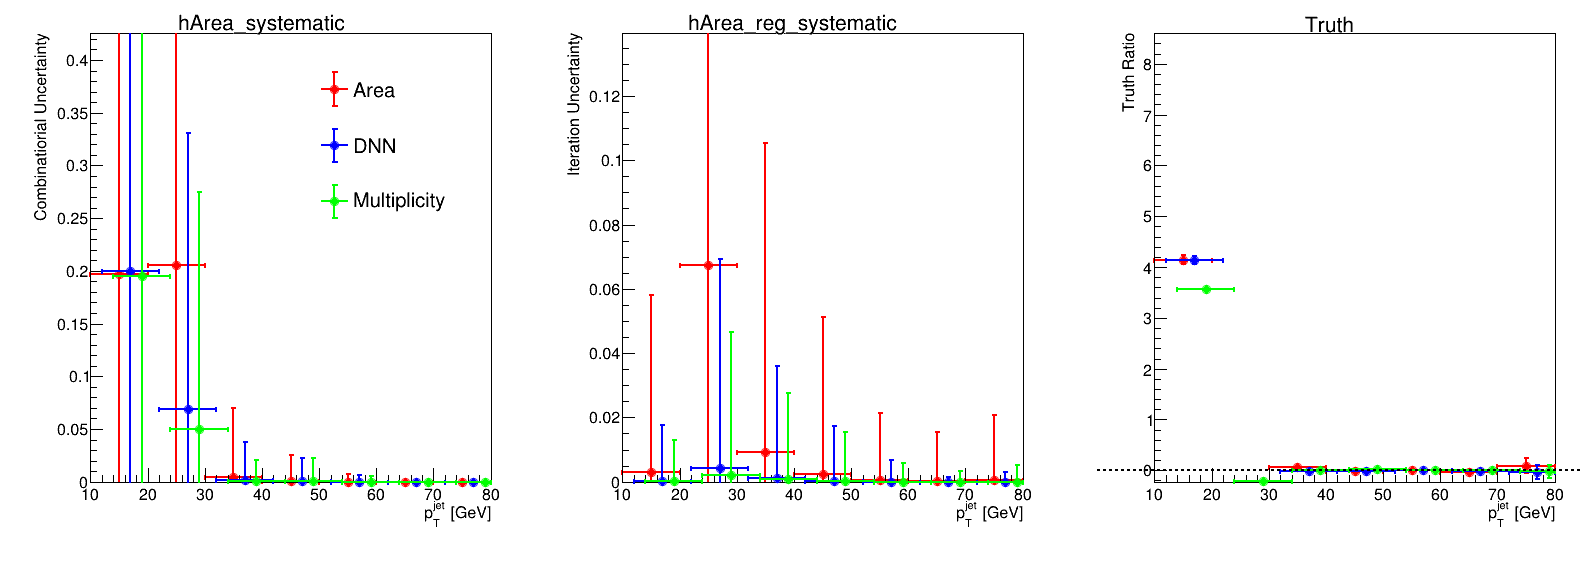

In [20]:
c = ROOT.TCanvas("c", "c", 1600, 600)
ROOT.gStyle.SetOptStat(0)
leg = ROOT.TLegend(0.6,0.6,0.9,0.9)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(hArea_systematic,'Area','lep')
leg.AddEntry(hDNN_systematic,'DNN','lep')
leg.AddEntry(hMultiplicty_systematic,'Multiplicity','lep')

tline = ROOT.TLine(0,0,85,0)
tline.SetLineColor(ROOT.kBlack)
tline.SetLineWidth(2)
tline.SetLineStyle(2)

c.Divide(3,1)

c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)
ROOT.gPad.SetTopMargin(0.05)
ymax_a = max(hArea_systematic.GetMaximum(),hDNN_systematic.GetMaximum(),hMultiplicty_systematic.GetMaximum())
ymin_a = min(hArea_systematic.GetMinimum(),hDNN_systematic.GetMinimum(),hMultiplicty_systematic.GetMinimum())
hArea_systematic.GetYaxis().SetRangeUser(ymin_a*0.8,ymax_a*1.2)
hArea_systematic.GetYaxis().SetTitle('Combinatiorial Uncertainty')
hArea_systematic.GetXaxis().SetTitle('p_{T}^{jet} [GeV]')
hArea_systematic.Draw('E1 P')
hDNN_systematic.SetBarOffset(0.2)
hDNN_systematic.Draw('E1 P SAME')
hMultiplicty_systematic.SetBarOffset(0.4)
hMultiplicty_systematic.Draw('E1 P SAME')
leg.Draw()

c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)
ROOT.gPad.SetTopMargin(0.05)
ymax_b = max(hArea_reg_systematic.GetMaximum(),hDNN_reg_systematic.GetMaximum(),hMultiplicty_reg_systematic.GetMaximum())
ymin_b = min(hArea_reg_systematic.GetMinimum(),hDNN_reg_systematic.GetMinimum(),hMultiplicty_reg_systematic.GetMinimum())
hArea_reg_systematic.GetYaxis().SetRangeUser(ymin_b*0.8,ymax_b*1.2)
hArea_reg_systematic.GetYaxis().SetTitle('Iteration Uncertainty')
hArea_reg_systematic.GetXaxis().SetTitle('p_{T}^{jet} [GeV]')
hArea_reg_systematic.Draw('E1 P')
hDNN_reg_systematic.SetBarOffset(0.2)
hDNN_reg_systematic.Draw('E1 P SAME')
hMultiplicty_reg_systematic.SetBarOffset(0.4)
hMultiplicty_reg_systematic.Draw('E1 P SAME')

c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetBottomMargin(0.15)
ROOT.gPad.SetTopMargin(0.05)
ymax_c = max(hArea_truth_ratio.GetMaximum(),hDNN_truth_ratio.GetMaximum(),hMultiplicty_truth_ratio.GetMaximum())
ymin_c = min(hArea_truth_ratio.GetMinimum(),hDNN_truth_ratio.GetMinimum(),hMultiplicty_truth_ratio.GetMinimum())

hArea_truth_ratio.GetYaxis().SetRangeUser(ymin_c*0.8,ymax_c*1.2)
hArea_truth_ratio.GetYaxis().SetTitle('Truth Ratio')
hArea_truth_ratio.GetXaxis().SetTitle('p_{T}^{jet} [GeV]')
hArea_truth_ratio.Draw('E1 P')
hDNN_truth_ratio.SetBarOffset(0.2)
hDNN_truth_ratio.Draw('E1 P SAME')
hMultiplicty_truth_ratio.SetBarOffset(0.4)
hMultiplicty_truth_ratio.Draw('E1 P SAME')
tline.Draw("SAME")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


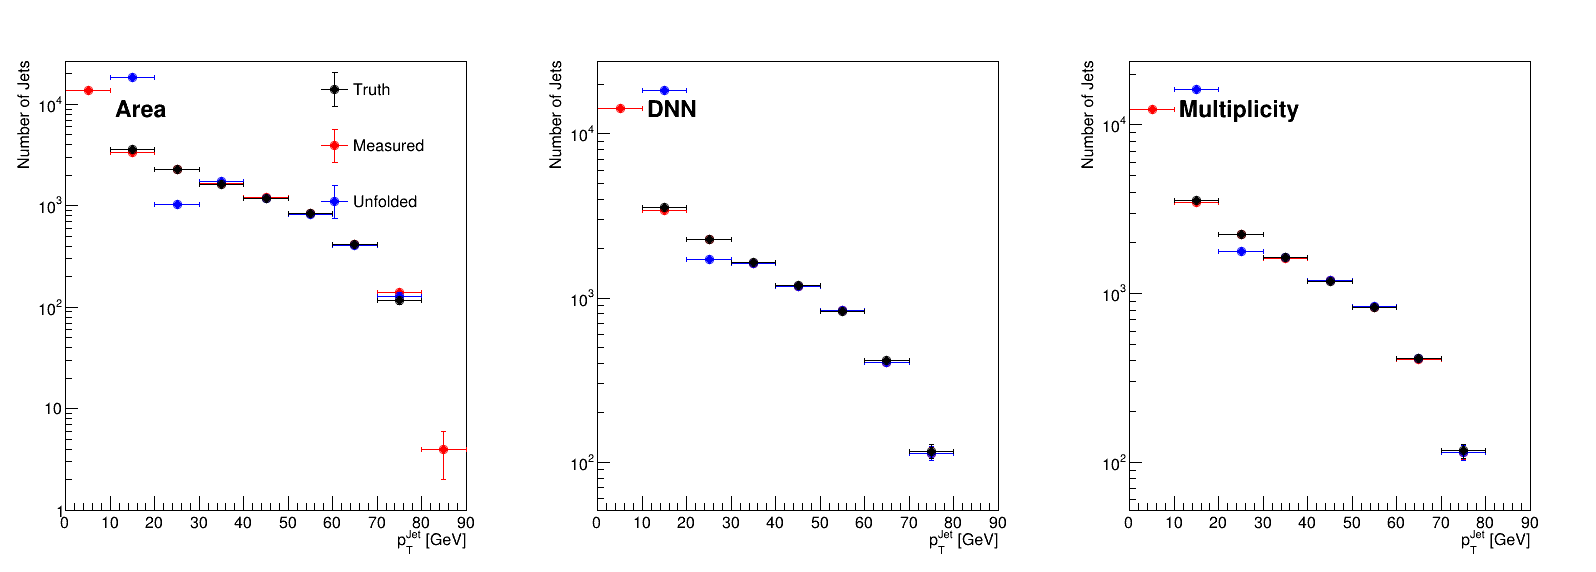

In [21]:
def formatHist(h, color, marker, title):
    h.SetLineColor(color)
    h.SetMarkerColor(color)
    h.SetMarkerStyle(marker)
    h.SetMarkerSize(1)
    h.SetTitle("")
    h.GetXaxis().SetTitle("p_{T}^{Jet} [GeV]")
    h.GetYaxis().SetTitle("Number of Jets")
    h.GetYaxis().SetTitleOffset(1.5)
    h.GetXaxis().SetRangeUser(0, 100)
    return h  

c = ROOT.TCanvas("c", "c", 1600, 600)
c.SetLogy()
ROOT.gStyle.SetOptStat(0)
c.Divide(3,1)
hMeas_area = formatHist(hMeas_area, ROOT.kRed, 20, "Area")
hUnfold_area = formatHist(hUnfold_area, ROOT.kBlue, 20, "Area")
hTruth = formatHist(hTruth, ROOT.kBlack, 20, "Truth")
c.cd(1)
ROOT.gPad.SetLogy()
hMeas_area.Draw("E1")
hUnfold_area.Draw("E1 same")
hTruth.Draw("E1 same")
leg = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(hTruth, "Truth", "lep")
leg.AddEntry(hMeas_area, "Measured", "lep")
leg.AddEntry(hUnfold_area, "Unfolded", "lep")
leg.Draw()
text = ROOT.TLatex( 0.2, 0.8, "Area")
text.SetNDC()
text.Draw()

c.cd(2)
ROOT.gPad.SetLogy()
hMeas_dnn = formatHist(hMeas_dnn, ROOT.kRed, 20, "DNN")
hUnfold_dnn = formatHist(hUnfold_dnn, ROOT.kBlue, 20, "DNN")

hMeas_dnn.Draw("E1")
hUnfold_dnn.Draw("E1 same")
hTruth.Draw("E1 same")
text_dnn = ROOT.TLatex( 0.2, 0.8, "DNN")
text_dnn.SetNDC()
text_dnn.Draw()

c.cd(3)
ROOT.gPad.SetLogy()
hMeas_multiplicity = formatHist(hMeas_multiplicity, ROOT.kRed, 20, "Multiplicity")
hUnfold_multiplicity = formatHist(hUnfold_multiplicity, ROOT.kBlue, 20, "Multiplicity")

hMeas_multiplicity.Draw("E1")
hUnfold_multiplicity.Draw("E1 same")
hTruth.Draw("E1 same")

text_multiplicity = ROOT.TLatex( 0.2, 0.8, "Multiplicity")
text_multiplicity.SetNDC()
text_multiplicity.Draw()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


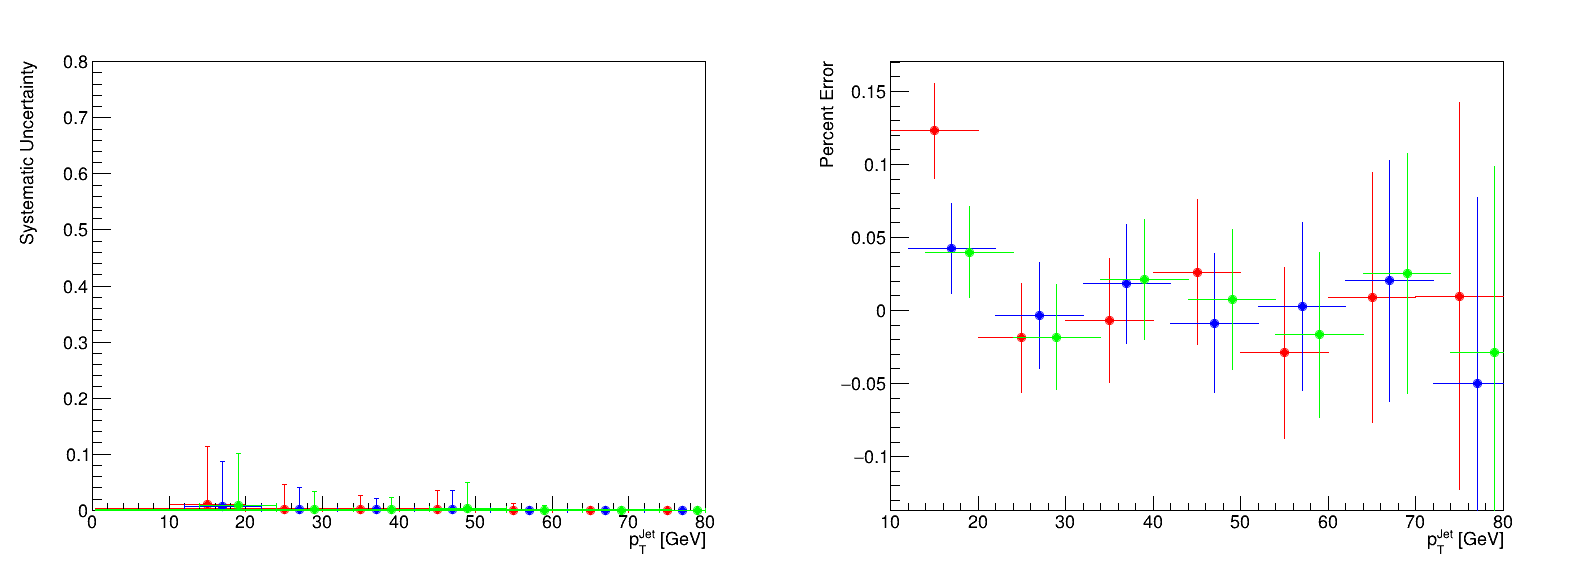

In [56]:
def formatHist(h, color, marker, title):
    h.SetLineColor(color)
    h.SetMarkerColor(color)
    h.SetMarkerStyle(marker)
    h.SetMarkerSize(1)
    h.SetTitle("")
    h.GetXaxis().SetTitle("p_{T}^{Jet} [GeV]")
    h.GetYaxis().SetTitle("Systematic Uncertainty")
    h.GetYaxis().SetTitleOffset(1.5)
    h.GetXaxis().SetRangeUser(0, 100)
    return h  

hArea_systematic = formatHist(hArea_systematic, ROOT.kRed, 20, "Area")
hUnfold_area = formatHist(hUnfold_area, ROOT.kRed, 20, "Area")
hUnfold_area_ratio = formatHist(hArea_ratio, ROOT.kRed, 20, "Area")

hDNN_systematic = formatHist(hDNN_systematic, ROOT.kBlue, 20, "DNN")
hUnfold_dnn = formatHist(hUnfold_dnn, ROOT.kBlue, 20, "DNN")
hUnfold_dnn_ratio = formatHist(hDNN_ratio, ROOT.kBlue, 20, "DNN")

hMultiplicty_systematic = formatHist(hMultiplicty_systematic, ROOT.kGreen, 20, "Multiplicity")
hUnfold_multiplicity = formatHist(hUnfold_multiplicity, ROOT.kGreen, 20, "Multiplicity")
hUnfold_multiplicity_ratio = formatHist(hMult_ratio, ROOT.kGreen, 20, "Multiplicity")

c = ROOT.TCanvas("c", "c", 1600, 600)
ROOT.gStyle.SetOptStat(0)
c.Divide(2,1)
c.cd(1)
# ROOT.gPad.SetLogy()

fit_type = "pol1"
hArea_systematic.Draw("P E1")
hArea_systematic.GetXaxis().SetRangeUser(5, 80)
hArea_systematic.GetYaxis().SetRangeUser(0, 0.8)
hArea_systematic.Fit(fit_type,"Q")

hDNN_systematic.SetBarOffset(0.2)
hDNN_systematic.Draw("P E1 SAME")
hDNN_systematic.Fit(fit_type,"Q")
hDNN_systematic.GetFunction(fit_type).SetLineColor(ROOT.kBlue)

hMultiplicty_systematic.SetBarOffset(0.4)
hMultiplicty_systematic.Draw("P E1 SAME")
hMultiplicty_systematic.Fit(fit_type,"Q")
hMultiplicty_systematic.GetFunction(fit_type).SetLineColor(ROOT.kGreen)


c.cd(2)
hUnfold_area_ratio.Draw("P")
hUnfold_area_ratio.GetYaxis().SetTitle("Percent Error")
hUnfold_dnn_ratio.SetBarOffset(0.2)
hUnfold_area_ratio.GetXaxis().SetRangeUser(10, 80)
hUnfold_dnn_ratio.Draw("P SAME")
hUnfold_multiplicity_ratio.SetBarOffset(0.4)
hUnfold_multiplicity_ratio.Draw("P SAME")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


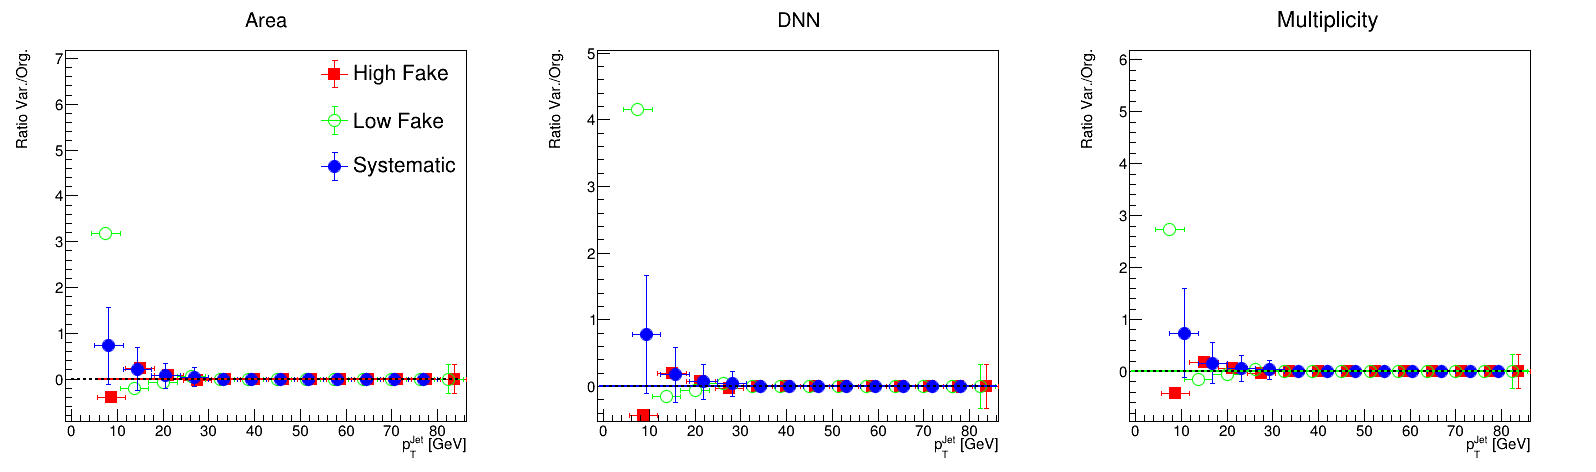

In [44]:
def formatHist(h, color, marker, title):
    h.SetLineColor(color)
    h.SetMarkerColor(color)
    h.SetMarkerStyle(marker)
    h.SetMarkerSize(1.5)
    h.GetXaxis().SetRangeUser(0, 85)
    h.SetTitle(title)
    h.GetXaxis().SetTitle("p_{T}^{Jet} [GeV]")
    h.GetYaxis().SetTitle("Ratio Var./Org.")
    h.GetYaxis().SetTitleOffset(1.5)
    return h  

def GetMaxMinY(h1, h2):
    max = h1.GetMaximum()
    if h2.GetMaximum() > max:
        max = h2.GetMaximum()
    min = h1.GetMinimum()
    if h2.GetMinimum() < min:
        min = h2.GetMinimum()
    return max, min

hArea_upper = formatHist(hArea_upper, ROOT.kRed, ROOT.kFullSquare, "Area")
hArea_lower = formatHist(hArea_lower, ROOT.kGreen,ROOT.kOpenCircle, "Area")
hArea_systematic = formatHist(hArea_systematic, ROOT.kBlue,20, "Area")

hDNN_upper = formatHist(hDNN_upper, ROOT.kRed, ROOT.kFullSquare, "DNN")
hDNN_lower = formatHist(hDNN_lower, ROOT.kGreen, ROOT.kOpenCircle, "DNN")
hDNN_systematic = formatHist(hDNN_systematic, ROOT.kBlue,20, "DNN")

hMult_upper = formatHist(hMult_upper, ROOT.kRed, ROOT.kFullSquare, "Multiplicity")
hMult_lower = formatHist(hMult_lower, ROOT.kGreen, ROOT.kOpenCircle, "Multiplicity")
hMultiplicty_systematic = formatHist(hMultiplicty_systematic, ROOT.kBlue,20, "Multiplicity")

c = ROOT.TCanvas("c", "c", 1600, 500)
ROOT.gStyle.SetOptStat(0)
c.Divide(3,1)
c.cd(1)
fit_type = "pol1"

max_y, min_y = GetMaxMinY(hArea_upper, hArea_lower)
hArea_upper.GetYaxis().SetRangeUser(1.5*min_y, 1.5*max_y)
hArea_upper.SetBarOffset(0.1)
tline = ROOT.TLine(0, 0, 85, 0)
tline.SetLineColor(ROOT.kBlack)
tline.SetLineStyle(2)
tline.SetLineWidth(2)
hArea_upper.Draw("P E1")
hArea_lower.Draw("P E1 same")
hArea_lower.SetBarOffset(-0.1)
hArea_systematic.Draw("P E1 same")
tline.Draw("same")

leg = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(hArea_upper, "High Fake", "lep")
leg.AddEntry(hArea_lower, "Low Fake", "lep")
leg.AddEntry(hArea_systematic, "Systematic", "lep")
leg.Draw()


c.cd(2)
max_y, min_y = GetMaxMinY(hDNN_upper, hDNN_lower)
hDNN_upper.GetYaxis().SetRangeUser(1.1*min_y, 1.1*max_y)
hDNN_upper.SetBarOffset(0.1)
hDNN_upper.Draw("P E1")
hDNN_lower.Draw("P E1 same")
hDNN_lower.SetBarOffset(-0.1)
hDNN_systematic.Draw("P E1 same")
tline.Draw("same")

c.cd(3)
max_y, min_y = GetMaxMinY(hMult_upper, hMult_lower)
hMult_upper.GetYaxis().SetRangeUser(1.5*min_y, 1.5*max_y)
hMult_upper.SetBarOffset(0.1)
hMult_upper.Draw("P E1")
hMult_lower.Draw("P E1 same")
hMult_lower.SetBarOffset(-0.1)
hMultiplicty_systematic.Draw("P E1 same")
tline.Draw("same")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hArea_total_systematic (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hDNN_total_systematic (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hMult_total_systematic (Potential memory leak).


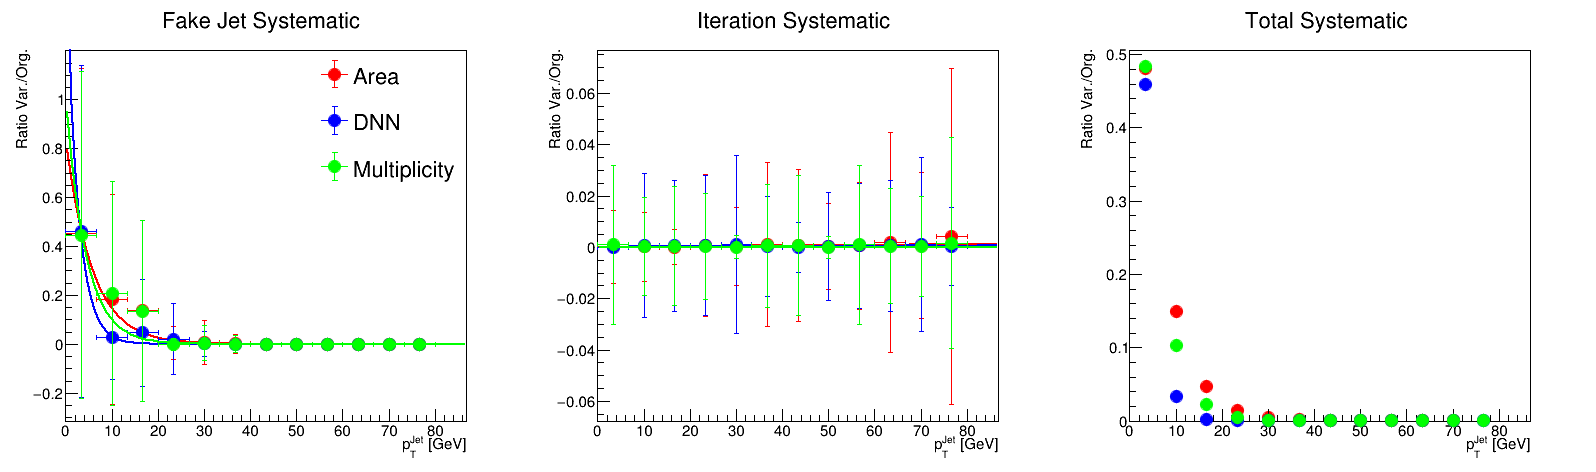

In [41]:
def formatHist(h, color, marker, title):
    h.SetLineColor(color)
    h.SetMarkerColor(color)
    h.SetMarkerStyle(marker)
    h.SetMarkerSize(1.5)
    h.GetXaxis().SetRangeUser(0, 85)
    h.SetTitle(title)
    h.GetXaxis().SetTitle("p_{T}^{Jet} [GeV]")
    h.GetYaxis().SetTitle("Ratio Var./Org.")
    h.GetYaxis().SetTitleOffset(1.5)
    return h  
   
    
hArea_systematic = formatHist(hArea_systematic, ROOT.kRed,20, "Fake Jet Systematic")
hDNN_systematic = formatHist(hDNN_systematic, ROOT.kBlue,20, "DNN")
hMultiplicty_systematic = formatHist(hMultiplicty_systematic, ROOT.kGreen,20, "Multiplicity")
hArea_reg_systematic = formatHist(hArea_reg_systematic, ROOT.kRed,20, "Iteration Systematic")
hDNN_reg_systematic = formatHist(hDNN_reg_systematic, ROOT.kBlue,20, "DNN")
hMultiplicty_reg_systematic = formatHist(hMultiplicty_reg_systematic, ROOT.kGreen,20, "Multiplicity")


c = ROOT.TCanvas("c", "c", 1600, 500)
ROOT.gStyle.SetOptStat(0)
c.Divide(3,1)
c.cd(1)
fit_type = "expo"
hArea_systematic.Draw("P E1")
hArea_systematic.Fit(fit_type,"Q")  
area_system_func = ROOT.TF1("area_system_func", fit_type, 0, 85)
for par in range(0, area_system_func.GetNpar()):
    area_system_func.SetParameter(par, hArea_systematic.GetFunction(fit_type).GetParameter(par)) 
hArea_systematic.GetFunction(fit_type).SetLineColor(ROOT.kRed)

hDNN_systematic.Draw("P E1 same")
hDNN_systematic.Fit(fit_type,"Q")
dnn_system_func = ROOT.TF1("dnn_system_func", fit_type, 0, 85)
for par in range(0, dnn_system_func.GetNpar()):
    dnn_system_func.SetParameter(par, hDNN_systematic.GetFunction(fit_type).GetParameter(par))
hDNN_systematic.GetFunction(fit_type).SetLineColor(ROOT.kBlue)

hMultiplicty_systematic.Draw("P E1 same")
hMultiplicty_systematic.Fit(fit_type,"Q")
mult_system_func = ROOT.TF1("mult_system_func", fit_type, 0, 85)
for par in range(0, mult_system_func.GetNpar()):
    mult_system_func.SetParameter(par, hMultiplicty_systematic.GetFunction(fit_type).GetParameter(par))
hMultiplicty_systematic.GetFunction(fit_type).SetLineColor(ROOT.kGreen)


leg = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(hArea_systematic, "Area", "lep")
leg.AddEntry(hDNN_systematic, "DNN", "lep")
leg.AddEntry(hMultiplicty_systematic, "Multiplicity", "lep")
leg.Draw()

c.cd(2)
fit_type = "pol1"
hArea_reg_systematic.Draw("P E1")
hArea_reg_systematic.Fit(fit_type,"Q")
area_iter_func = ROOT.TF1("area_iter_func", fit_type, 0, 85)
for par in range(0, area_iter_func.GetNpar()):
    area_iter_func.SetParameter(par, hArea_reg_systematic.GetFunction(fit_type).GetParameter(par))
hArea_reg_systematic.GetFunction(fit_type).SetLineColor(ROOT.kRed)

hDNN_reg_systematic.Draw("P E1 same")
hDNN_reg_systematic.Fit(fit_type,"Q")
dnn_iter_func = ROOT.TF1("dnn_iter_func", fit_type, 0, 85)
for par in range(0, dnn_iter_func.GetNpar()):
    dnn_iter_func.SetParameter(par, hDNN_reg_systematic.GetFunction(fit_type).GetParameter(par))
hDNN_reg_systematic.GetFunction(fit_type).SetLineColor(ROOT.kBlue)

hMultiplicty_reg_systematic.Draw("P E1 same")
hMultiplicty_reg_systematic.Fit(fit_type,"Q")
mult_iter_func = ROOT.TF1("mult_iter_func", fit_type, 0, 85)
for par in range(0, mult_iter_func.GetNpar()):
    mult_iter_func.SetParameter(par, hMultiplicty_reg_systematic.GetFunction(fit_type).GetParameter(par))
hMultiplicty_reg_systematic.GetFunction(fit_type).SetLineColor(ROOT.kGreen)


c.cd(3)

hArea_total_systematic = ROOT.TH1D("hArea_total_systematic", "hArea_total_systematic", hArea_systematic.GetNbinsX(), hArea_systematic.GetXaxis().GetXmin(), hArea_systematic.GetXaxis().GetXmax())
hDNN_total_systematic = ROOT.TH1D("hDNN_total_systematic", "hDNN_total_systematic", hDNN_systematic.GetNbinsX(), hDNN_systematic.GetXaxis().GetXmin(), hDNN_systematic.GetXaxis().GetXmax())
hMult_total_systematic = ROOT.TH1D("hMult_total_systematic", "hMult_total_systematic", hMultiplicty_systematic.GetNbinsX(), hMultiplicty_systematic.GetXaxis().GetXmin(), hMultiplicty_systematic.GetXaxis().GetXmax())

for i in range(1,hArea_systematic.GetNbinsX()):
    x = hArea_systematic.GetBinCenter(i)
    a = area_system_func.Eval(x)
    b = area_iter_func.Eval(x)
    total_error = np.sqrt(a**2 + b**2)
    hArea_total_systematic.SetBinContent(i, total_error)
    hArea_total_systematic.SetBinError(i, 0)

for i in range(1,hDNN_systematic.GetNbinsX()+1):
    x = hDNN_systematic.GetBinCenter(i)
    a = dnn_system_func.Eval(x)
    b = dnn_iter_func.Eval(x)
    total_error = np.sqrt(a**2 + b**2)
    hDNN_total_systematic.SetBinContent(i, total_error)
    hDNN_total_systematic.SetBinError(i, 0)
    
for i in range(1,hMultiplicty_systematic.GetNbinsX()+1):
    x = hMultiplicty_systematic.GetBinCenter(i)
    a = mult_system_func.Eval(x)
    b = mult_iter_func.Eval(x)
    total_error = np.sqrt(a**2 + b**2)
    hMult_total_systematic.SetBinContent(i, total_error)
    hMult_total_systematic.SetBinError(i, 0)
    
hArea_total_systematic = formatHist(hArea_total_systematic, ROOT.kRed,20, "Total Systematic")


hDNN_total_systematic = formatHist(hDNN_total_systematic, ROOT.kBlue,20, "Total Systematic")


hMult_total_systematic = formatHist(hMult_total_systematic, ROOT.kGreen,20, "Total Systematic")

hArea_total_systematic.Draw("E2 P")
hDNN_total_systematic.Draw("E2 P same")
hMult_total_systematic.Draw("E2 P same")




c.Draw()